In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Vince Misalucha/Downloads/sell_coordinates/sell_1802.csv")
df.head()

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price
0,642177c66e5cd1f39af9887fd68788de3ec84870,sell,apartment,Aquiraz,Ceará,-3.838596,-38.395409,37,3,1,200000.0
1,a7a391546a4f46f8a707861aae721e21364c308b,sell,apartment,Aquiraz,Ceará,-3.838382,-38.395873,37,3,1,180000.0
2,f1702ed50626c84fb2dc9dcf50bcc2f2557c8aa3,sell,apartment,Aquiraz,Ceará,-3.838617,-38.395390,56,3,2,380000.0
3,fd667e7524131792b76dfdaddad12c30c8280b71,sell,apartment,Santa Catarina,Santa Catarina,-27.242339,-50.218856,135,3,3,350000.0
4,c9807d1b79ebd399fa16e822631dcf0a2866f14f,sell,apartment,Santa Catarina,Santa Catarina,-27.242339,-50.218856,65,2,1,185000.0


In [3]:
br_apt = df[(df.property_type == 'apartment') & (df.state_name == 'Rio de Janeiro')]
br_apt

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price
61,be7ae0e7c9d9db7716c3ef015946df4bc7abd7e8,sell,apartment,Cabo Frio,Rio de Janeiro,-22.880538,-42.011184,100,4,1,700000.0
62,6d634c3522854c89154309ae95f307b6a1823669,sell,apartment,Cabo Frio,Rio de Janeiro,-22.881948,-42.030779,118,3,1,630000.0
145,73889dc8ed570d1fbdbcc328855e58f152b8af90,sell,apartment,Braga,Rio de Janeiro,-22.892347,-42.034239,196,4,1,796000.0
146,cb92c906229c7fa9319c40e5ca0421a09aa8401d,sell,apartment,Braga,Rio de Janeiro,-22.897251,-42.038994,100,3,1,540000.0
168,2d16dc1b7475f6ce47b7bba31639470cf4631865,sell,apartment,Centro,Rio de Janeiro,-22.879171,-42.013357,100,2,1,740000.0
...,...,...,...,...,...,...,...,...,...,...,...
7097,e3fc290ca2040da035c1b80c6bfd0bead03f8201,sell,apartment,Recreio dos Bandeirantes,Rio de Janeiro,-23.026735,-43.462758,138,5,1,2289856.0
7098,f86627e9922e45ddce84375da7679b2be6295e3c,sell,apartment,Recreio dos Bandeirantes,Rio de Janeiro,-23.026735,-43.462758,152,5,1,2767929.0
7099,891679b9e2c96cc3e5dc405e0a7bec9fde389718,sell,apartment,Recreio dos Bandeirantes,Rio de Janeiro,-23.028483,-43.467767,88,3,1,683000.0
7100,443d752f5d7527d5f3e31ac4f7281d2eeafdccdc,sell,apartment,Recreio dos Bandeirantes,Rio de Janeiro,-23.028583,-43.467500,275,3,1,1550000.0


In [4]:
br_apt_2 = br_apt.iloc[:, 5:]
br_apt_2

,lat,lon,surface_covered_in_m2,floor,rooms,price
61,-22.880538,-42.011184,100,4,1,700000.0
62,-22.881948,-42.030779,118,3,1,630000.0
145,-22.892347,-42.034239,196,4,1,796000.0
146,-22.897251,-42.038994,100,3,1,540000.0
168,-22.879171,-42.013357,100,2,1,740000.0
...,...,...,...,...,...,...
7097,-23.026735,-43.462758,138,5,1,2289856.0
7098,-23.026735,-43.462758,152,5,1,2767929.0
7099,-23.028483,-43.467767,88,3,1,683000.0
7100,-23.028583,-43.467500,275,3,1,1550000.0


In [5]:
x = br_apt_2.iloc[:,:-1]
y = br_apt_2['price']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=21)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
def neural_net_model(x_train, x_test, y_train, y_test):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    
    batch_size = 128
    max_epochs = 20000
    
    model.fit(x_train, y_train.values, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stop], validation_data=(x_test,y_test.values), verbose =2)
    
    return model

In [35]:
model = neural_net_model(x_train, x_test, y_train, y_test)

Epoch 1/20000
43/43 - 0s - loss: 5146412580864.0000 - val_loss: 4584620163072.0000
Epoch 2/20000
43/43 - 0s - loss: 5146413105152.0000 - val_loss: 4584619638784.0000
Epoch 3/20000
43/43 - 0s - loss: 5146414153728.0000 - val_loss: 4584619638784.0000
Epoch 4/20000
43/43 - 0s - loss: 5146412580864.0000 - val_loss: 4584619114496.0000
Epoch 5/20000
43/43 - 0s - loss: 5146413105152.0000 - val_loss: 4584618065920.0000
Epoch 6/20000
43/43 - 0s - loss: 5146411532288.0000 - val_loss: 4584617017344.0000
Epoch 7/20000
43/43 - 0s - loss: 5146411008000.0000 - val_loss: 4584615968768.0000
Epoch 8/20000
43/43 - 0s - loss: 5146409435136.0000 - val_loss: 4584614395904.0000
Epoch 9/20000
43/43 - 0s - loss: 5146407337984.0000 - val_loss: 4584611774464.0000
Epoch 10/20000
43/43 - 0s - loss: 5146404716544.0000 - val_loss: 4584609153024.0000
Epoch 11/20000
43/43 - 0s - loss: 5146402619392.0000 - val_loss: 4584606531584.0000
Epoch 12/20000
43/43 - 0s - loss: 5146398425088.0000 - val_loss: 4584603385856.0000
E

Epoch 99/20000
43/43 - 0s - loss: 5142674407424.0000 - val_loss: 4580797579264.0000
Epoch 100/20000
43/43 - 0s - loss: 5142581084160.0000 - val_loss: 4580703207424.0000
Epoch 101/20000
43/43 - 0s - loss: 5142487236608.0000 - val_loss: 4580606738432.0000
Epoch 102/20000
43/43 - 0s - loss: 5142391291904.0000 - val_loss: 4580510793728.0000
Epoch 103/20000
43/43 - 0s - loss: 5142294298624.0000 - val_loss: 4580412751872.0000
Epoch 104/20000
43/43 - 0s - loss: 5142195732480.0000 - val_loss: 4580312088576.0000
Epoch 105/20000
43/43 - 0s - loss: 5142097166336.0000 - val_loss: 4580212473856.0000
Epoch 106/20000
43/43 - 0s - loss: 5141997027328.0000 - val_loss: 4580109189120.0000
Epoch 107/20000
43/43 - 0s - loss: 5141895839744.0000 - val_loss: 4580005380096.0000
Epoch 108/20000
43/43 - 0s - loss: 5141790982144.0000 - val_loss: 4579901046784.0000
Epoch 109/20000
43/43 - 0s - loss: 5141686648832.0000 - val_loss: 4579794616320.0000
Epoch 110/20000
43/43 - 0s - loss: 5141580218368.0000 - val_loss: 

Epoch 196/20000
43/43 - 0s - loss: 5126869221376.0000 - val_loss: 4564770095104.0000
Epoch 197/20000
43/43 - 0s - loss: 5126626476032.0000 - val_loss: 4564524728320.0000
Epoch 198/20000
43/43 - 0s - loss: 5126381633536.0000 - val_loss: 4564277788672.0000
Epoch 199/20000
43/43 - 0s - loss: 5126135742464.0000 - val_loss: 4564027703296.0000
Epoch 200/20000
43/43 - 0s - loss: 5125888278528.0000 - val_loss: 4563778666496.0000
Epoch 201/20000
43/43 - 0s - loss: 5125638717440.0000 - val_loss: 4563523862528.0000
Epoch 202/20000
43/43 - 0s - loss: 5125387059200.0000 - val_loss: 4563269582848.0000
Epoch 203/20000
43/43 - 0s - loss: 5125132779520.0000 - val_loss: 4563012157440.0000
Epoch 204/20000
43/43 - 0s - loss: 5124877975552.0000 - val_loss: 4562753683456.0000
Epoch 205/20000
43/43 - 0s - loss: 5124621074432.0000 - val_loss: 4562492588032.0000
Epoch 206/20000
43/43 - 0s - loss: 5124361027584.0000 - val_loss: 4562231492608.0000
Epoch 207/20000
43/43 - 0s - loss: 5124101505024.0000 - val_loss:

Epoch 293/20000
43/43 - 0s - loss: 5094229671936.0000 - val_loss: 4531729465344.0000
Epoch 294/20000
43/43 - 0s - loss: 5093789794304.0000 - val_loss: 4531283820544.0000
Epoch 295/20000
43/43 - 0s - loss: 5093346770944.0000 - val_loss: 4530838175744.0000
Epoch 296/20000
43/43 - 0s - loss: 5092902699008.0000 - val_loss: 4530382569472.0000
Epoch 297/20000
43/43 - 0s - loss: 5092453908480.0000 - val_loss: 4529930633216.0000
Epoch 298/20000
43/43 - 0s - loss: 5092005117952.0000 - val_loss: 4529476599808.0000
Epoch 299/20000
43/43 - 0s - loss: 5091553705984.0000 - val_loss: 4529017323520.0000
Epoch 300/20000
43/43 - 0s - loss: 5091098624000.0000 - val_loss: 4528565387264.0000
Epoch 301/20000
43/43 - 0s - loss: 5090645114880.0000 - val_loss: 4528098770944.0000
Epoch 302/20000
43/43 - 0s - loss: 5090184265728.0000 - val_loss: 4527636873216.0000
Epoch 303/20000
43/43 - 0s - loss: 5089722892288.0000 - val_loss: 4527170256896.0000
Epoch 304/20000
43/43 - 0s - loss: 5089260470272.0000 - val_loss:

Epoch 390/20000
43/43 - 0s - loss: 5040364847104.0000 - val_loss: 4477232349184.0000
Epoch 391/20000
43/43 - 0s - loss: 5039683796992.0000 - val_loss: 4476547629056.0000
Epoch 392/20000
43/43 - 0s - loss: 5039000649728.0000 - val_loss: 4475862908928.0000
Epoch 393/20000
43/43 - 0s - loss: 5038318026752.0000 - val_loss: 4475168751616.0000
Epoch 394/20000
43/43 - 0s - loss: 5037629636608.0000 - val_loss: 4474473021440.0000
Epoch 395/20000
43/43 - 0s - loss: 5036941770752.0000 - val_loss: 4473768902656.0000
Epoch 396/20000
43/43 - 0s - loss: 5036245516288.0000 - val_loss: 4473076318208.0000
Epoch 397/20000
43/43 - 0s - loss: 5035553980416.0000 - val_loss: 4472367480832.0000
Epoch 398/20000
43/43 - 0s - loss: 5034854055936.0000 - val_loss: 4471665983488.0000
Epoch 399/20000
43/43 - 0s - loss: 5034152558592.0000 - val_loss: 4470965534720.0000
Epoch 400/20000
43/43 - 0s - loss: 5033452634112.0000 - val_loss: 4470246735872.0000
Epoch 401/20000
43/43 - 0s - loss: 5032744321024.0000 - val_loss:

Epoch 487/20000
43/43 - 0s - loss: 4961593196544.0000 - val_loss: 4397578584064.0000
Epoch 488/20000
43/43 - 0s - loss: 4960638992384.0000 - val_loss: 4396613894144.0000
Epoch 489/20000
43/43 - 0s - loss: 4959683215360.0000 - val_loss: 4395648155648.0000
Epoch 490/20000
43/43 - 0s - loss: 4958726914048.0000 - val_loss: 4394669309952.0000
Epoch 491/20000
43/43 - 0s - loss: 4957764321280.0000 - val_loss: 4393704882176.0000
Epoch 492/20000
43/43 - 0s - loss: 4956801204224.0000 - val_loss: 4392732852224.0000
Epoch 493/20000
43/43 - 0s - loss: 4955836514304.0000 - val_loss: 4391754792960.0000
Epoch 494/20000
43/43 - 0s - loss: 4954866057216.0000 - val_loss: 4390776733696.0000
Epoch 495/20000
43/43 - 0s - loss: 4953892978688.0000 - val_loss: 4389791596544.0000
Epoch 496/20000
43/43 - 0s - loss: 4952917803008.0000 - val_loss: 4388798857216.0000
Epoch 497/20000
43/43 - 0s - loss: 4951938957312.0000 - val_loss: 4387807690752.0000
Epoch 498/20000
43/43 - 0s - loss: 4950958014464.0000 - val_loss:

Epoch 584/20000
43/43 - 0s - loss: 4855236132864.0000 - val_loss: 4290031910912.0000
Epoch 585/20000
43/43 - 0s - loss: 4853990424576.0000 - val_loss: 4288768114688.0000
Epoch 586/20000
43/43 - 0s - loss: 4852739997696.0000 - val_loss: 4287495929856.0000
Epoch 587/20000
43/43 - 0s - loss: 4851483279360.0000 - val_loss: 4286239473664.0000
Epoch 588/20000
43/43 - 0s - loss: 4850231803904.0000 - val_loss: 4284961259520.0000
Epoch 589/20000
43/43 - 0s - loss: 4848969842688.0000 - val_loss: 4283691171840.0000
Epoch 590/20000
43/43 - 0s - loss: 4847707357184.0000 - val_loss: 4282415841280.0000
Epoch 591/20000
43/43 - 0s - loss: 4846440677376.0000 - val_loss: 4281144442880.0000
Epoch 592/20000
43/43 - 0s - loss: 4845175046144.0000 - val_loss: 4279847616512.0000
Epoch 593/20000
43/43 - 0s - loss: 4843901550592.0000 - val_loss: 4278555508736.0000
Epoch 594/20000
43/43 - 0s - loss: 4842624385024.0000 - val_loss: 4277276508160.0000
Epoch 595/20000
43/43 - 0s - loss: 4841346695168.0000 - val_loss:

Epoch 681/20000
43/43 - 0s - loss: 4719749627904.0000 - val_loss: 4153000591360.0000
Epoch 682/20000
43/43 - 0s - loss: 4718199308288.0000 - val_loss: 4151443193856.0000
Epoch 683/20000
43/43 - 0s - loss: 4716647415808.0000 - val_loss: 4149884485632.0000
Epoch 684/20000
43/43 - 0s - loss: 4715091853312.0000 - val_loss: 4148310310912.0000
Epoch 685/20000
43/43 - 0s - loss: 4713532096512.0000 - val_loss: 4146732204032.0000
Epoch 686/20000
43/43 - 0s - loss: 4711969193984.0000 - val_loss: 4145154097152.0000
Epoch 687/20000
43/43 - 0s - loss: 4710403670016.0000 - val_loss: 4143565242368.0000
Epoch 688/20000
43/43 - 0s - loss: 4708839718912.0000 - val_loss: 4141964066816.0000
Epoch 689/20000
43/43 - 0s - loss: 4707262136320.0000 - val_loss: 4140387008512.0000
Epoch 690/20000
43/43 - 0s - loss: 4705695563776.0000 - val_loss: 4138776133632.0000
Epoch 691/20000
43/43 - 0s - loss: 4704112214016.0000 - val_loss: 4137189113856.0000
Epoch 692/20000
43/43 - 0s - loss: 4702533058560.0000 - val_loss:

Epoch 778/20000
43/43 - 0s - loss: 4555307745280.0000 - val_loss: 3986663407616.0000
Epoch 779/20000
43/43 - 0s - loss: 4553468018688.0000 - val_loss: 3984805593088.0000
Epoch 780/20000
43/43 - 0s - loss: 4551625670656.0000 - val_loss: 3982934409216.0000
Epoch 781/20000
43/43 - 0s - loss: 4549779652608.0000 - val_loss: 3981071089664.0000
Epoch 782/20000
43/43 - 0s - loss: 4547928391680.0000 - val_loss: 3979197546496.0000
Epoch 783/20000
43/43 - 0s - loss: 4546080800768.0000 - val_loss: 3977320333312.0000
Epoch 784/20000
43/43 - 0s - loss: 4544224821248.0000 - val_loss: 3975452557312.0000
Epoch 785/20000
43/43 - 0s - loss: 4542370414592.0000 - val_loss: 3973577703424.0000
Epoch 786/20000
43/43 - 0s - loss: 4540514435072.0000 - val_loss: 3971690266624.0000
Epoch 787/20000
43/43 - 0s - loss: 4538651115520.0000 - val_loss: 3969803091968.0000
Epoch 788/20000
43/43 - 0s - loss: 4536783077376.0000 - val_loss: 3967926403072.0000
Epoch 789/20000
43/43 - 0s - loss: 4534916087808.0000 - val_loss:

Epoch 875/20000
43/43 - 0s - loss: 4364192448512.0000 - val_loss: 3793239408640.0000
Epoch 876/20000
43/43 - 0s - loss: 4362095558656.0000 - val_loss: 3791116042240.0000
Epoch 877/20000
43/43 - 0s - loss: 4359998406656.0000 - val_loss: 3788990840832.0000
Epoch 878/20000
43/43 - 0s - loss: 4357901516800.0000 - val_loss: 3786857775104.0000
Epoch 879/20000
43/43 - 0s - loss: 4355795189760.0000 - val_loss: 3784748302336.0000
Epoch 880/20000
43/43 - 0s - loss: 4353701969920.0000 - val_loss: 3782594002944.0000
Epoch 881/20000
43/43 - 0s - loss: 4351589875712.0000 - val_loss: 3780473782272.0000
Epoch 882/20000
43/43 - 0s - loss: 4349479616512.0000 - val_loss: 3778343075840.0000
Epoch 883/20000
43/43 - 0s - loss: 4347370930176.0000 - val_loss: 3776195592192.0000
Epoch 884/20000
43/43 - 0s - loss: 4345252282368.0000 - val_loss: 3774068555776.0000
Epoch 885/20000
43/43 - 0s - loss: 4343141236736.0000 - val_loss: 3771920547840.0000
Epoch 886/20000
43/43 - 0s - loss: 4341015773184.0000 - val_loss:

Epoch 972/20000
43/43 - 0s - loss: 4150899769344.0000 - val_loss: 3577206013952.0000
Epoch 973/20000
43/43 - 0s - loss: 4148610203648.0000 - val_loss: 3574890233856.0000
Epoch 974/20000
43/43 - 0s - loss: 4146316181504.0000 - val_loss: 3572556103680.0000
Epoch 975/20000
43/43 - 0s - loss: 4144031072256.0000 - val_loss: 3570186321920.0000
Epoch 976/20000
43/43 - 0s - loss: 4141711622144.0000 - val_loss: 3567920611328.0000
Epoch 977/20000
43/43 - 0s - loss: 4139417600000.0000 - val_loss: 3565582811136.0000
Epoch 978/20000
43/43 - 0s - loss: 4137120169984.0000 - val_loss: 3563237146624.0000
Epoch 979/20000
43/43 - 0s - loss: 4134819856384.0000 - val_loss: 3560888074240.0000
Epoch 980/20000
43/43 - 0s - loss: 4132512727040.0000 - val_loss: 3558550011904.0000
Epoch 981/20000
43/43 - 0s - loss: 4130202714112.0000 - val_loss: 3556230823936.0000
Epoch 982/20000
43/43 - 0s - loss: 4127897419776.0000 - val_loss: 3553878081536.0000
Epoch 983/20000
43/43 - 0s - loss: 4125586096128.0000 - val_loss:

Epoch 1068/20000
43/43 - 0s - loss: 3925201649664.0000 - val_loss: 3348332544000.0000
Epoch 1069/20000
43/43 - 0s - loss: 3922811158528.0000 - val_loss: 3345883332608.0000
Epoch 1070/20000
43/43 - 0s - loss: 3920411230208.0000 - val_loss: 3343471345664.0000
Epoch 1071/20000
43/43 - 0s - loss: 3918019166208.0000 - val_loss: 3341043892224.0000
Epoch 1072/20000
43/43 - 0s - loss: 3915630510080.0000 - val_loss: 3338606215168.0000
Epoch 1073/20000
43/43 - 0s - loss: 3913237397504.0000 - val_loss: 3336175091712.0000
Epoch 1074/20000
43/43 - 0s - loss: 3910845595648.0000 - val_loss: 3333723258880.0000
Epoch 1075/20000
43/43 - 0s - loss: 3908440948736.0000 - val_loss: 3331311534080.0000
Epoch 1076/20000
43/43 - 0s - loss: 3906050195456.0000 - val_loss: 3328864157696.0000
Epoch 1077/20000
43/43 - 0s - loss: 3903641092096.0000 - val_loss: 3326460297216.0000
Epoch 1078/20000
43/43 - 0s - loss: 3901251387392.0000 - val_loss: 3324017639424.0000
Epoch 1079/20000
43/43 - 0s - loss: 3898843332608.0000

Epoch 1164/20000
43/43 - 0s - loss: 3695180251136.0000 - val_loss: 3114618322944.0000
Epoch 1165/20000
43/43 - 0s - loss: 3692789235712.0000 - val_loss: 3112229404672.0000
Epoch 1166/20000
43/43 - 0s - loss: 3690429939712.0000 - val_loss: 3109795659776.0000
Epoch 1167/20000
43/43 - 0s - loss: 3688047575040.0000 - val_loss: 3107432693760.0000
Epoch 1168/20000
43/43 - 0s - loss: 3685694046208.0000 - val_loss: 3104986628096.0000
Epoch 1169/20000
43/43 - 0s - loss: 3683323478016.0000 - val_loss: 3102577524736.0000
Epoch 1170/20000
43/43 - 0s - loss: 3680958939136.0000 - val_loss: 3100175499264.0000
Epoch 1171/20000
43/43 - 0s - loss: 3678590730240.0000 - val_loss: 3097787891712.0000
Epoch 1172/20000
43/43 - 0s - loss: 3676221997056.0000 - val_loss: 3095420469248.0000
Epoch 1173/20000
43/43 - 0s - loss: 3673867943936.0000 - val_loss: 3092983578624.0000
Epoch 1174/20000
43/43 - 0s - loss: 3671497900032.0000 - val_loss: 3090544066560.0000
Epoch 1175/20000
43/43 - 0s - loss: 3669120778240.0000

Epoch 1260/20000
43/43 - 0s - loss: 3474485936128.0000 - val_loss: 2889881485312.0000
Epoch 1261/20000
43/43 - 0s - loss: 3472296509440.0000 - val_loss: 2887612628992.0000
Epoch 1262/20000
43/43 - 0s - loss: 3470098432000.0000 - val_loss: 2885389910016.0000
Epoch 1263/20000
43/43 - 0s - loss: 3467905335296.0000 - val_loss: 2883151200256.0000
Epoch 1264/20000
43/43 - 0s - loss: 3465718267904.0000 - val_loss: 2880904101888.0000
Epoch 1265/20000
43/43 - 0s - loss: 3463532773376.0000 - val_loss: 2878669324288.0000
Epoch 1266/20000
43/43 - 0s - loss: 3461351735296.0000 - val_loss: 2876429565952.0000
Epoch 1267/20000
43/43 - 0s - loss: 3459159949312.0000 - val_loss: 2874247479296.0000
Epoch 1268/20000
43/43 - 0s - loss: 3456996474880.0000 - val_loss: 2871996710912.0000
Epoch 1269/20000
43/43 - 0s - loss: 3454815436800.0000 - val_loss: 2869789458432.0000
Epoch 1270/20000
43/43 - 0s - loss: 3452646195200.0000 - val_loss: 2867581943808.0000
Epoch 1271/20000
43/43 - 0s - loss: 3450478264320.0000

Epoch 1356/20000
43/43 - 0s - loss: 3279104507904.0000 - val_loss: 2689966800896.0000
Epoch 1357/20000
43/43 - 0s - loss: 3277271334912.0000 - val_loss: 2688090898432.0000
Epoch 1358/20000
43/43 - 0s - loss: 3275447074816.0000 - val_loss: 2686183800832.0000
Epoch 1359/20000
43/43 - 0s - loss: 3273628581888.0000 - val_loss: 2684296101888.0000
Epoch 1360/20000
43/43 - 0s - loss: 3271806681088.0000 - val_loss: 2682460307456.0000
Epoch 1361/20000
43/43 - 0s - loss: 3270004703232.0000 - val_loss: 2680579424256.0000
Epoch 1362/20000
43/43 - 0s - loss: 3268196433920.0000 - val_loss: 2678723444736.0000
Epoch 1363/20000
43/43 - 0s - loss: 3266393407488.0000 - val_loss: 2676858814464.0000
Epoch 1364/20000
43/43 - 0s - loss: 3264581206016.0000 - val_loss: 2675064963072.0000
Epoch 1365/20000
43/43 - 0s - loss: 3262798364672.0000 - val_loss: 2673233100800.0000
Epoch 1366/20000
43/43 - 0s - loss: 3261025222656.0000 - val_loss: 2671343304704.0000
Epoch 1367/20000
43/43 - 0s - loss: 3259227963392.0000

Epoch 1452/20000
43/43 - 0s - loss: 3127958306816.0000 - val_loss: 2533928468480.0000
Epoch 1453/20000
43/43 - 0s - loss: 3126642081792.0000 - val_loss: 2532668866560.0000
Epoch 1454/20000
43/43 - 0s - loss: 3125384577024.0000 - val_loss: 2531302047744.0000
Epoch 1455/20000
43/43 - 0s - loss: 3124106362880.0000 - val_loss: 2529969307648.0000
Epoch 1456/20000
43/43 - 0s - loss: 3122841255936.0000 - val_loss: 2528651771904.0000
Epoch 1457/20000
43/43 - 0s - loss: 3121584275456.0000 - val_loss: 2527342886912.0000
Epoch 1458/20000
43/43 - 0s - loss: 3120319168512.0000 - val_loss: 2526031118336.0000
Epoch 1459/20000
43/43 - 0s - loss: 3119074246656.0000 - val_loss: 2524719349760.0000
Epoch 1460/20000
43/43 - 0s - loss: 3117818052608.0000 - val_loss: 2523465777152.0000
Epoch 1461/20000
43/43 - 0s - loss: 3116605636608.0000 - val_loss: 2522148503552.0000
Epoch 1462/20000
43/43 - 0s - loss: 3115371986944.0000 - val_loss: 2520868978688.0000
Epoch 1463/20000
43/43 - 0s - loss: 3114148823040.0000

Epoch 1548/20000
43/43 - 0s - loss: 3035098251264.0000 - val_loss: 2436424531968.0000
Epoch 1549/20000
43/43 - 0s - loss: 3034424279040.0000 - val_loss: 2435753443328.0000
Epoch 1550/20000
43/43 - 0s - loss: 3033775210496.0000 - val_loss: 2435103326208.0000
Epoch 1551/20000
43/43 - 0s - loss: 3033138987008.0000 - val_loss: 2434357002240.0000
Epoch 1552/20000
43/43 - 0s - loss: 3032496472064.0000 - val_loss: 2433672806400.0000
Epoch 1553/20000
43/43 - 0s - loss: 3031867588608.0000 - val_loss: 2433009057792.0000
Epoch 1554/20000
43/43 - 0s - loss: 3031255482368.0000 - val_loss: 2432347930624.0000
Epoch 1555/20000
43/43 - 0s - loss: 3030639968256.0000 - val_loss: 2431699648512.0000
Epoch 1556/20000
43/43 - 0s - loss: 3030035726336.0000 - val_loss: 2431056084992.0000
Epoch 1557/20000
43/43 - 0s - loss: 3029441445888.0000 - val_loss: 2430390501376.0000
Epoch 1558/20000
43/43 - 0s - loss: 3028826456064.0000 - val_loss: 2429801725952.0000
Epoch 1559/20000
43/43 - 0s - loss: 3028237680640.0000

Epoch 1644/20000
43/43 - 0s - loss: 2993925390336.0000 - val_loss: 2391780098048.0000
Epoch 1645/20000
43/43 - 0s - loss: 2993662984192.0000 - val_loss: 2391499603968.0000
Epoch 1646/20000
43/43 - 0s - loss: 2993401888768.0000 - val_loss: 2391228284928.0000
Epoch 1647/20000
43/43 - 0s - loss: 2993154162688.0000 - val_loss: 2390956703744.0000
Epoch 1648/20000
43/43 - 0s - loss: 2992910893056.0000 - val_loss: 2390682238976.0000
Epoch 1649/20000
43/43 - 0s - loss: 2992656351232.0000 - val_loss: 2390426124288.0000
Epoch 1650/20000
43/43 - 0s - loss: 2992414130176.0000 - val_loss: 2390145105920.0000
Epoch 1651/20000
43/43 - 0s - loss: 2992174268416.0000 - val_loss: 2389859106816.0000
Epoch 1652/20000
43/43 - 0s - loss: 2991931260928.0000 - val_loss: 2389601681408.0000
Epoch 1653/20000
43/43 - 0s - loss: 2991687204864.0000 - val_loss: 2389356576768.0000
Epoch 1654/20000
43/43 - 0s - loss: 2991448915968.0000 - val_loss: 2389097578496.0000
Epoch 1655/20000
43/43 - 0s - loss: 2991220326400.0000

Epoch 1740/20000
43/43 - 0s - loss: 2975741509632.0000 - val_loss: 2372090724352.0000
Epoch 1741/20000
43/43 - 0s - loss: 2975595233280.0000 - val_loss: 2371921903616.0000
Epoch 1742/20000
43/43 - 0s - loss: 2975442403328.0000 - val_loss: 2371750199296.0000
Epoch 1743/20000
43/43 - 0s - loss: 2975282757632.0000 - val_loss: 2371608641536.0000
Epoch 1744/20000
43/43 - 0s - loss: 2975137005568.0000 - val_loss: 2371437985792.0000
Epoch 1745/20000
43/43 - 0s - loss: 2974980243456.0000 - val_loss: 2371290660864.0000
Epoch 1746/20000
43/43 - 0s - loss: 2974844977152.0000 - val_loss: 2371129442304.0000
Epoch 1747/20000
43/43 - 0s - loss: 2974689263616.0000 - val_loss: 2370961408000.0000
Epoch 1748/20000
43/43 - 0s - loss: 2974533812224.0000 - val_loss: 2370810675200.0000
Epoch 1749/20000
43/43 - 0s - loss: 2974389370880.0000 - val_loss: 2370664923136.0000
Epoch 1750/20000
43/43 - 0s - loss: 2974237065216.0000 - val_loss: 2370516811776.0000
Epoch 1751/20000
43/43 - 0s - loss: 2974098653184.0000

Epoch 1836/20000
43/43 - 0s - loss: 2962010669056.0000 - val_loss: 2358045573120.0000
Epoch 1837/20000
43/43 - 0s - loss: 2961871470592.0000 - val_loss: 2357905326080.0000
Epoch 1838/20000
43/43 - 0s - loss: 2961732796416.0000 - val_loss: 2357758001152.0000
Epoch 1839/20000
43/43 - 0s - loss: 2961588879360.0000 - val_loss: 2357627453440.0000
Epoch 1840/20000
43/43 - 0s - loss: 2961449418752.0000 - val_loss: 2357486419968.0000
Epoch 1841/20000
43/43 - 0s - loss: 2961308647424.0000 - val_loss: 2357339095040.0000
Epoch 1842/20000
43/43 - 0s - loss: 2961168662528.0000 - val_loss: 2357197799424.0000
Epoch 1843/20000
43/43 - 0s - loss: 2961027104768.0000 - val_loss: 2357055193088.0000
Epoch 1844/20000
43/43 - 0s - loss: 2960886333440.0000 - val_loss: 2356913635328.0000
Epoch 1845/20000
43/43 - 0s - loss: 2960748969984.0000 - val_loss: 2356777320448.0000
Epoch 1846/20000
43/43 - 0s - loss: 2960610820096.0000 - val_loss: 2356634451968.0000
Epoch 1847/20000
43/43 - 0s - loss: 2960468738048.0000

Epoch 1932/20000
43/43 - 0s - loss: 2948590206976.0000 - val_loss: 2344728920064.0000
Epoch 1933/20000
43/43 - 0s - loss: 2948447862784.0000 - val_loss: 2344580546560.0000
Epoch 1934/20000
43/43 - 0s - loss: 2948303683584.0000 - val_loss: 2344440299520.0000
Epoch 1935/20000
43/43 - 0s - loss: 2948164485120.0000 - val_loss: 2344302673920.0000
Epoch 1936/20000
43/43 - 0s - loss: 2948022665216.0000 - val_loss: 2344166883328.0000
Epoch 1937/20000
43/43 - 0s - loss: 2947877961728.0000 - val_loss: 2344027947008.0000
Epoch 1938/20000
43/43 - 0s - loss: 2947740860416.0000 - val_loss: 2343894253568.0000
Epoch 1939/20000
43/43 - 0s - loss: 2947594321920.0000 - val_loss: 2343739326464.0000
Epoch 1940/20000
43/43 - 0s - loss: 2947452502016.0000 - val_loss: 2343617429504.0000
Epoch 1941/20000
43/43 - 0s - loss: 2947307536384.0000 - val_loss: 2343466434560.0000
Epoch 1942/20000
43/43 - 0s - loss: 2947163095040.0000 - val_loss: 2343320944640.0000
Epoch 1943/20000
43/43 - 0s - loss: 2947019702272.0000

Epoch 2028/20000
43/43 - 0s - loss: 2934802481152.0000 - val_loss: 2331176075264.0000
Epoch 2029/20000
43/43 - 0s - loss: 2934650175488.0000 - val_loss: 2331041071104.0000
Epoch 2030/20000
43/43 - 0s - loss: 2934511763456.0000 - val_loss: 2330897678336.0000
Epoch 2031/20000
43/43 - 0s - loss: 2934367059968.0000 - val_loss: 2330759528448.0000
Epoch 2032/20000
43/43 - 0s - loss: 2934221570048.0000 - val_loss: 2330621640704.0000
Epoch 2033/20000
43/43 - 0s - loss: 2934075031552.0000 - val_loss: 2330479296512.0000
Epoch 2034/20000
43/43 - 0s - loss: 2933935833088.0000 - val_loss: 2330342981632.0000
Epoch 2035/20000
43/43 - 0s - loss: 2933785886720.0000 - val_loss: 2330195394560.0000
Epoch 2036/20000
43/43 - 0s - loss: 2933639086080.0000 - val_loss: 2330055147520.0000
Epoch 2037/20000
43/43 - 0s - loss: 2933494120448.0000 - val_loss: 2329915949056.0000
Epoch 2038/20000
43/43 - 0s - loss: 2933352038400.0000 - val_loss: 2329775177728.0000
Epoch 2039/20000
43/43 - 0s - loss: 2933212839936.0000

Epoch 2124/20000
43/43 - 0s - loss: 2920685240320.0000 - val_loss: 2317379436544.0000
Epoch 2125/20000
43/43 - 0s - loss: 2920541847552.0000 - val_loss: 2317222150144.0000
Epoch 2126/20000
43/43 - 0s - loss: 2920374861824.0000 - val_loss: 2317081640960.0000
Epoch 2127/20000
43/43 - 0s - loss: 2920231469056.0000 - val_loss: 2316933791744.0000
Epoch 2128/20000
43/43 - 0s - loss: 2920079687680.0000 - val_loss: 2316802457600.0000
Epoch 2129/20000
43/43 - 0s - loss: 2919931838464.0000 - val_loss: 2316639404032.0000
Epoch 2130/20000
43/43 - 0s - loss: 2919777173504.0000 - val_loss: 2316497321984.0000
Epoch 2131/20000
43/43 - 0s - loss: 2919627227136.0000 - val_loss: 2316358647808.0000
Epoch 2132/20000
43/43 - 0s - loss: 2919487242240.0000 - val_loss: 2316203458560.0000
Epoch 2133/20000
43/43 - 0s - loss: 2919327858688.0000 - val_loss: 2316067930112.0000
Epoch 2134/20000
43/43 - 0s - loss: 2919177650176.0000 - val_loss: 2315916148736.0000
Epoch 2135/20000
43/43 - 0s - loss: 2919029276672.0000

Epoch 2220/20000
43/43 - 0s - loss: 2906199425024.0000 - val_loss: 2303228903424.0000
Epoch 2221/20000
43/43 - 0s - loss: 2906039779328.0000 - val_loss: 2303097044992.0000
Epoch 2222/20000
43/43 - 0s - loss: 2905884065792.0000 - val_loss: 2302931369984.0000
Epoch 2223/20000
43/43 - 0s - loss: 2905731760128.0000 - val_loss: 2302778540032.0000
Epoch 2224/20000
43/43 - 0s - loss: 2905577881600.0000 - val_loss: 2302635147264.0000
Epoch 2225/20000
43/43 - 0s - loss: 2905433964544.0000 - val_loss: 2302478909440.0000
Epoch 2226/20000
43/43 - 0s - loss: 2905270386688.0000 - val_loss: 2302342332416.0000
Epoch 2227/20000
43/43 - 0s - loss: 2905118867456.0000 - val_loss: 2302190026752.0000
Epoch 2228/20000
43/43 - 0s - loss: 2904960532480.0000 - val_loss: 2302034837504.0000
Epoch 2229/20000
43/43 - 0s - loss: 2904804818944.0000 - val_loss: 2301888299008.0000
Epoch 2230/20000
43/43 - 0s - loss: 2904651464704.0000 - val_loss: 2301741760512.0000
Epoch 2231/20000
43/43 - 0s - loss: 2904500731904.0000

Epoch 2316/20000
43/43 - 0s - loss: 2891235983360.0000 - val_loss: 2288645046272.0000
Epoch 2317/20000
43/43 - 0s - loss: 2891075289088.0000 - val_loss: 2288495099904.0000
Epoch 2318/20000
43/43 - 0s - loss: 2890913808384.0000 - val_loss: 2288343580672.0000
Epoch 2319/20000
43/43 - 0s - loss: 2890767007744.0000 - val_loss: 2288172924928.0000
Epoch 2320/20000
43/43 - 0s - loss: 2890593730560.0000 - val_loss: 2288027959296.0000
Epoch 2321/20000
43/43 - 0s - loss: 2890437230592.0000 - val_loss: 2287864905728.0000
Epoch 2322/20000
43/43 - 0s - loss: 2890282303488.0000 - val_loss: 2287713386496.0000
Epoch 2323/20000
43/43 - 0s - loss: 2890114007040.0000 - val_loss: 2287552430080.0000
Epoch 2324/20000
43/43 - 0s - loss: 2889954361344.0000 - val_loss: 2287401697280.0000
Epoch 2325/20000
43/43 - 0s - loss: 2889792880640.0000 - val_loss: 2287239430144.0000
Epoch 2326/20000
43/43 - 0s - loss: 2889629564928.0000 - val_loss: 2287085289472.0000
Epoch 2327/20000
43/43 - 0s - loss: 2889470181376.0000

Epoch 2412/20000
43/43 - 0s - loss: 2875559772160.0000 - val_loss: 2273383546880.0000
Epoch 2413/20000
43/43 - 0s - loss: 2875396980736.0000 - val_loss: 2273218658304.0000
Epoch 2414/20000
43/43 - 0s - loss: 2875231043584.0000 - val_loss: 2273049575424.0000
Epoch 2415/20000
43/43 - 0s - loss: 2875064582144.0000 - val_loss: 2272883113984.0000
Epoch 2416/20000
43/43 - 0s - loss: 2874898907136.0000 - val_loss: 2272722419712.0000
Epoch 2417/20000
43/43 - 0s - loss: 2874732183552.0000 - val_loss: 2272567754752.0000
Epoch 2418/20000
43/43 - 0s - loss: 2874563887104.0000 - val_loss: 2272410468352.0000
Epoch 2419/20000
43/43 - 0s - loss: 2874403454976.0000 - val_loss: 2272249511936.0000
Epoch 2420/20000
43/43 - 0s - loss: 2874231488512.0000 - val_loss: 2272090128384.0000
Epoch 2421/20000
43/43 - 0s - loss: 2874066599936.0000 - val_loss: 2271920783360.0000
Epoch 2422/20000
43/43 - 0s - loss: 2873906429952.0000 - val_loss: 2271750127616.0000
Epoch 2423/20000
43/43 - 0s - loss: 2873728958464.0000

Epoch 2508/20000
43/43 - 0s - loss: 2859337515008.0000 - val_loss: 2257601429504.0000
Epoch 2509/20000
43/43 - 0s - loss: 2859163975680.0000 - val_loss: 2257437065216.0000
Epoch 2510/20000
43/43 - 0s - loss: 2858994630656.0000 - val_loss: 2257274273792.0000
Epoch 2511/20000
43/43 - 0s - loss: 2858825285632.0000 - val_loss: 2257107288064.0000
Epoch 2512/20000
43/43 - 0s - loss: 2858653581312.0000 - val_loss: 2256945020928.0000
Epoch 2513/20000
43/43 - 0s - loss: 2858487644160.0000 - val_loss: 2256778559488.0000
Epoch 2514/20000
43/43 - 0s - loss: 2858314629120.0000 - val_loss: 2256610000896.0000
Epoch 2515/20000
43/43 - 0s - loss: 2858141876224.0000 - val_loss: 2256453500928.0000
Epoch 2516/20000
43/43 - 0s - loss: 2857969123328.0000 - val_loss: 2256272359424.0000
Epoch 2517/20000
43/43 - 0s - loss: 2857797943296.0000 - val_loss: 2256103276544.0000
Epoch 2518/20000
43/43 - 0s - loss: 2857628073984.0000 - val_loss: 2255935766528.0000
Epoch 2519/20000
43/43 - 0s - loss: 2857453748224.0000

Epoch 2604/20000
43/43 - 0s - loss: 2842588086272.0000 - val_loss: 2241325432832.0000
Epoch 2605/20000
43/43 - 0s - loss: 2842406158336.0000 - val_loss: 2241157136384.0000
Epoch 2606/20000
43/43 - 0s - loss: 2842225541120.0000 - val_loss: 2240988839936.0000
Epoch 2607/20000
43/43 - 0s - loss: 2842054361088.0000 - val_loss: 2240805076992.0000
Epoch 2608/20000
43/43 - 0s - loss: 2841873743872.0000 - val_loss: 2240641499136.0000
Epoch 2609/20000
43/43 - 0s - loss: 2841693388800.0000 - val_loss: 2240466386944.0000
Epoch 2610/20000
43/43 - 0s - loss: 2841521422336.0000 - val_loss: 2240297041920.0000
Epoch 2611/20000
43/43 - 0s - loss: 2841347096576.0000 - val_loss: 2240111968256.0000
Epoch 2612/20000
43/43 - 0s - loss: 2841161498624.0000 - val_loss: 2239954944000.0000
Epoch 2613/20000
43/43 - 0s - loss: 2840986124288.0000 - val_loss: 2239776948224.0000
Epoch 2614/20000
43/43 - 0s - loss: 2840813371392.0000 - val_loss: 2239604457472.0000
Epoch 2615/20000
43/43 - 0s - loss: 2840633802752.0000

Epoch 2700/20000
43/43 - 0s - loss: 2825201123328.0000 - val_loss: 2224466165760.0000
Epoch 2701/20000
43/43 - 0s - loss: 2825021292544.0000 - val_loss: 2224288432128.0000
Epoch 2702/20000
43/43 - 0s - loss: 2824838578176.0000 - val_loss: 2224098115584.0000
Epoch 2703/20000
43/43 - 0s - loss: 2824646426624.0000 - val_loss: 2223919595520.0000
Epoch 2704/20000
43/43 - 0s - loss: 2824458731520.0000 - val_loss: 2223750512640.0000
Epoch 2705/20000
43/43 - 0s - loss: 2824282046464.0000 - val_loss: 2223560196096.0000
Epoch 2706/20000
43/43 - 0s - loss: 2824094351360.0000 - val_loss: 2223389278208.0000
Epoch 2707/20000
43/43 - 0s - loss: 2823911636992.0000 - val_loss: 2223204990976.0000
Epoch 2708/20000
43/43 - 0s - loss: 2823726825472.0000 - val_loss: 2223046393856.0000
Epoch 2709/20000
43/43 - 0s - loss: 2823534936064.0000 - val_loss: 2222852407296.0000
Epoch 2710/20000
43/43 - 0s - loss: 2823351435264.0000 - val_loss: 2222679392256.0000
Epoch 2711/20000
43/43 - 0s - loss: 2823164526592.0000

Epoch 2796/20000
43/43 - 0s - loss: 2807030349824.0000 - val_loss: 2206840127488.0000
Epoch 2797/20000
43/43 - 0s - loss: 2806838984704.0000 - val_loss: 2206654005248.0000
Epoch 2798/20000
43/43 - 0s - loss: 2806646046720.0000 - val_loss: 2206476271616.0000
Epoch 2799/20000
43/43 - 0s - loss: 2806451798016.0000 - val_loss: 2206277566464.0000
Epoch 2800/20000
43/43 - 0s - loss: 2806250471424.0000 - val_loss: 2206094327808.0000
Epoch 2801/20000
43/43 - 0s - loss: 2806057533440.0000 - val_loss: 2205909516288.0000
Epoch 2802/20000
43/43 - 0s - loss: 2805862498304.0000 - val_loss: 2205714481152.0000
Epoch 2803/20000
43/43 - 0s - loss: 2805664317440.0000 - val_loss: 2205522067456.0000
Epoch 2804/20000
43/43 - 0s - loss: 2805470855168.0000 - val_loss: 2205334110208.0000
Epoch 2805/20000
43/43 - 0s - loss: 2805277917184.0000 - val_loss: 2205149298688.0000
Epoch 2806/20000
43/43 - 0s - loss: 2805088649216.0000 - val_loss: 2204961603584.0000
Epoch 2807/20000
43/43 - 0s - loss: 2804884439040.0000

Epoch 2892/20000
43/43 - 0s - loss: 2787986636800.0000 - val_loss: 2188404064256.0000
Epoch 2893/20000
43/43 - 0s - loss: 2787786620928.0000 - val_loss: 2188194742272.0000
Epoch 2894/20000
43/43 - 0s - loss: 2787573760000.0000 - val_loss: 2188004032512.0000
Epoch 2895/20000
43/43 - 0s - loss: 2787375054848.0000 - val_loss: 2187808735232.0000
Epoch 2896/20000
43/43 - 0s - loss: 2787177136128.0000 - val_loss: 2187597185024.0000
Epoch 2897/20000
43/43 - 0s - loss: 2786960605184.0000 - val_loss: 2187419713536.0000
Epoch 2898/20000
43/43 - 0s - loss: 2786757443584.0000 - val_loss: 2187215372288.0000
Epoch 2899/20000
43/43 - 0s - loss: 2786560835584.0000 - val_loss: 2187000020992.0000
Epoch 2900/20000
43/43 - 0s - loss: 2786351120384.0000 - val_loss: 2186808524800.0000
Epoch 2901/20000
43/43 - 0s - loss: 2786140094464.0000 - val_loss: 2186623582208.0000
Epoch 2902/20000
43/43 - 0s - loss: 2785960263680.0000 - val_loss: 2186401677312.0000
Epoch 2903/20000
43/43 - 0s - loss: 2785738227712.0000

Epoch 2988/20000
43/43 - 0s - loss: 2768042196992.0000 - val_loss: 2169117999104.0000
Epoch 2989/20000
43/43 - 0s - loss: 2767832481792.0000 - val_loss: 2168901337088.0000
Epoch 2990/20000
43/43 - 0s - loss: 2767622504448.0000 - val_loss: 2168712855552.0000
Epoch 2991/20000
43/43 - 0s - loss: 2767412264960.0000 - val_loss: 2168492785664.0000
Epoch 2992/20000
43/43 - 0s - loss: 2767200190464.0000 - val_loss: 2168298799104.0000
Epoch 2993/20000
43/43 - 0s - loss: 2766988640256.0000 - val_loss: 2168081219584.0000
Epoch 2994/20000
43/43 - 0s - loss: 2766775255040.0000 - val_loss: 2167882907648.0000
Epoch 2995/20000
43/43 - 0s - loss: 2766560296960.0000 - val_loss: 2167686299648.0000
Epoch 2996/20000
43/43 - 0s - loss: 2766350843904.0000 - val_loss: 2167475535872.0000
Epoch 2997/20000
43/43 - 0s - loss: 2766140866560.0000 - val_loss: 2167261626368.0000
Epoch 2998/20000
43/43 - 0s - loss: 2765927219200.0000 - val_loss: 2167061348352.0000
Epoch 2999/20000
43/43 - 0s - loss: 2765707804672.0000

Epoch 3084/20000
43/43 - 0s - loss: 2747064909824.0000 - val_loss: 2148833165312.0000
Epoch 3085/20000
43/43 - 0s - loss: 2746842087424.0000 - val_loss: 2148620042240.0000
Epoch 3086/20000
43/43 - 0s - loss: 2746622148608.0000 - val_loss: 2148409540608.0000
Epoch 3087/20000
43/43 - 0s - loss: 2746399850496.0000 - val_loss: 2148190519296.0000
Epoch 3088/20000
43/43 - 0s - loss: 2746171785216.0000 - val_loss: 2147979886592.0000
Epoch 3089/20000
43/43 - 0s - loss: 2745951322112.0000 - val_loss: 2147750772736.0000
Epoch 3090/20000
43/43 - 0s - loss: 2745722994688.0000 - val_loss: 2147538436096.0000
Epoch 3091/20000
43/43 - 0s - loss: 2745506988032.0000 - val_loss: 2147338551296.0000
Epoch 3092/20000
43/43 - 0s - loss: 2745281544192.0000 - val_loss: 2147128049664.0000
Epoch 3093/20000
43/43 - 0s - loss: 2745062129664.0000 - val_loss: 2146892251136.0000
Epoch 3094/20000
43/43 - 0s - loss: 2744828297216.0000 - val_loss: 2146667593728.0000
Epoch 3095/20000
43/43 - 0s - loss: 2744610979840.0000

Epoch 3180/20000
43/43 - 0s - loss: 2725106417664.0000 - val_loss: 2127654682624.0000
Epoch 3181/20000
43/43 - 0s - loss: 2724875730944.0000 - val_loss: 2127431467008.0000
Epoch 3182/20000
43/43 - 0s - loss: 2724637179904.0000 - val_loss: 2127186100224.0000
Epoch 3183/20000
43/43 - 0s - loss: 2724410163200.0000 - val_loss: 2126955937792.0000
Epoch 3184/20000
43/43 - 0s - loss: 2724159815680.0000 - val_loss: 2126732984320.0000
Epoch 3185/20000
43/43 - 0s - loss: 2723929391104.0000 - val_loss: 2126513963008.0000
Epoch 3186/20000
43/43 - 0s - loss: 2723688742912.0000 - val_loss: 2126288257024.0000
Epoch 3187/20000
43/43 - 0s - loss: 2723454386176.0000 - val_loss: 2126051278848.0000
Epoch 3188/20000
43/43 - 0s - loss: 2723217145856.0000 - val_loss: 2125831208960.0000
Epoch 3189/20000
43/43 - 0s - loss: 2722980954112.0000 - val_loss: 2125615464448.0000
Epoch 3190/20000
43/43 - 0s - loss: 2722742403072.0000 - val_loss: 2125370228736.0000
Epoch 3191/20000
43/43 - 0s - loss: 2722503327744.0000

Epoch 3276/20000
43/43 - 0s - loss: 2701957529600.0000 - val_loss: 2105343344640.0000
Epoch 3277/20000
43/43 - 0s - loss: 2701711376384.0000 - val_loss: 2105112657920.0000
Epoch 3278/20000
43/43 - 0s - loss: 2701466533888.0000 - val_loss: 2104873451520.0000
Epoch 3279/20000
43/43 - 0s - loss: 2701220118528.0000 - val_loss: 2104607244288.0000
Epoch 3280/20000
43/43 - 0s - loss: 2700957974528.0000 - val_loss: 2104375902208.0000
Epoch 3281/20000
43/43 - 0s - loss: 2700718112768.0000 - val_loss: 2104121098240.0000
Epoch 3282/20000
43/43 - 0s - loss: 2700461998080.0000 - val_loss: 2103902076928.0000
Epoch 3283/20000
43/43 - 0s - loss: 2700216893440.0000 - val_loss: 2103665623040.0000
Epoch 3284/20000
43/43 - 0s - loss: 2699966808064.0000 - val_loss: 2103407673344.0000
Epoch 3285/20000
43/43 - 0s - loss: 2699718557696.0000 - val_loss: 2103167418368.0000
Epoch 3286/20000
43/43 - 0s - loss: 2699463229440.0000 - val_loss: 2102935552000.0000
Epoch 3287/20000
43/43 - 0s - loss: 2699213930496.0000

Epoch 3372/20000
43/43 - 0s - loss: 2677438676992.0000 - val_loss: 2081713422336.0000
Epoch 3373/20000
43/43 - 0s - loss: 2677170241536.0000 - val_loss: 2081454686208.0000
Epoch 3374/20000
43/43 - 0s - loss: 2676908097536.0000 - val_loss: 2081195294720.0000
Epoch 3375/20000
43/43 - 0s - loss: 2676639399936.0000 - val_loss: 2080946126848.0000
Epoch 3376/20000
43/43 - 0s - loss: 2676372275200.0000 - val_loss: 2080694730752.0000
Epoch 3377/20000
43/43 - 0s - loss: 2676116946944.0000 - val_loss: 2080458670080.0000
Epoch 3378/20000
43/43 - 0s - loss: 2675860570112.0000 - val_loss: 2080183549952.0000
Epoch 3379/20000
43/43 - 0s - loss: 2675579551744.0000 - val_loss: 2079944474624.0000
Epoch 3380/20000
43/43 - 0s - loss: 2675316883456.0000 - val_loss: 2079688097792.0000
Epoch 3381/20000
43/43 - 0s - loss: 2675053953024.0000 - val_loss: 2079423987712.0000
Epoch 3382/20000
43/43 - 0s - loss: 2674790498304.0000 - val_loss: 2079178752000.0000
Epoch 3383/20000
43/43 - 0s - loss: 2674530975744.0000

Epoch 3468/20000
43/43 - 0s - loss: 2651755642880.0000 - val_loss: 2057024700416.0000
Epoch 3469/20000
43/43 - 0s - loss: 2651478556672.0000 - val_loss: 2056772517888.0000
Epoch 3470/20000
43/43 - 0s - loss: 2651207761920.0000 - val_loss: 2056495169536.0000
Epoch 3471/20000
43/43 - 0s - loss: 2650930413568.0000 - val_loss: 2056222539776.0000
Epoch 3472/20000
43/43 - 0s - loss: 2650658308096.0000 - val_loss: 2055971012608.0000
Epoch 3473/20000
43/43 - 0s - loss: 2650391969792.0000 - val_loss: 2055703494656.0000
Epoch 3474/20000
43/43 - 0s - loss: 2650099941376.0000 - val_loss: 2055433486336.0000
Epoch 3475/20000
43/43 - 0s - loss: 2649821544448.0000 - val_loss: 2055170686976.0000
Epoch 3476/20000
43/43 - 0s - loss: 2649545768960.0000 - val_loss: 2054895960064.0000
Epoch 3477/20000
43/43 - 0s - loss: 2649267634176.0000 - val_loss: 2054632243200.0000
Epoch 3478/20000
43/43 - 0s - loss: 2648984780800.0000 - val_loss: 2054371278848.0000
Epoch 3479/20000
43/43 - 0s - loss: 2648711626752.0000

Epoch 3564/20000
43/43 - 0s - loss: 2624273252352.0000 - val_loss: 2030619852800.0000
Epoch 3565/20000
43/43 - 0s - loss: 2623980175360.0000 - val_loss: 2030336344064.0000
Epoch 3566/20000
43/43 - 0s - loss: 2623692079104.0000 - val_loss: 2030044577792.0000
Epoch 3567/20000
43/43 - 0s - loss: 2623392186368.0000 - val_loss: 2029769457664.0000
Epoch 3568/20000
43/43 - 0s - loss: 2623097012224.0000 - val_loss: 2029500235776.0000
Epoch 3569/20000
43/43 - 0s - loss: 2622810488832.0000 - val_loss: 2029195100160.0000
Epoch 3570/20000
43/43 - 0s - loss: 2622505353216.0000 - val_loss: 2028922601472.0000
Epoch 3571/20000
43/43 - 0s - loss: 2622215421952.0000 - val_loss: 2028627820544.0000
Epoch 3572/20000
43/43 - 0s - loss: 2621915791360.0000 - val_loss: 2028350996480.0000
Epoch 3573/20000
43/43 - 0s - loss: 2621622714368.0000 - val_loss: 2028069060608.0000
Epoch 3574/20000
43/43 - 0s - loss: 2621333569536.0000 - val_loss: 2027793940480.0000
Epoch 3575/20000
43/43 - 0s - loss: 2621031579648.0000

Epoch 3660/20000
43/43 - 0s - loss: 2595405168640.0000 - val_loss: 2002919358464.0000
Epoch 3661/20000
43/43 - 0s - loss: 2595093217280.0000 - val_loss: 2002627461120.0000
Epoch 3662/20000
43/43 - 0s - loss: 2594788343808.0000 - val_loss: 2002343821312.0000
Epoch 3663/20000
43/43 - 0s - loss: 2594487664640.0000 - val_loss: 2002049564672.0000
Epoch 3664/20000
43/43 - 0s - loss: 2594181480448.0000 - val_loss: 2001736040448.0000
Epoch 3665/20000
43/43 - 0s - loss: 2593866383360.0000 - val_loss: 2001446371328.0000
Epoch 3666/20000
43/43 - 0s - loss: 2593556529152.0000 - val_loss: 2001155784704.0000
Epoch 3667/20000
43/43 - 0s - loss: 2593247461376.0000 - val_loss: 2000867164160.0000
Epoch 3668/20000
43/43 - 0s - loss: 2592939180032.0000 - val_loss: 2000570941440.0000
Epoch 3669/20000
43/43 - 0s - loss: 2592635092992.0000 - val_loss: 2000260169728.0000
Epoch 3670/20000
43/43 - 0s - loss: 2592324452352.0000 - val_loss: 1999973646336.0000
Epoch 3671/20000
43/43 - 0s - loss: 2592010928128.0000

Epoch 3756/20000
43/43 - 0s - loss: 2564894490624.0000 - val_loss: 1973680078848.0000
Epoch 3757/20000
43/43 - 0s - loss: 2564567859200.0000 - val_loss: 1973366947840.0000
Epoch 3758/20000
43/43 - 0s - loss: 2564237557760.0000 - val_loss: 1973068759040.0000
Epoch 3759/20000
43/43 - 0s - loss: 2563909091328.0000 - val_loss: 1972749205504.0000
Epoch 3760/20000
43/43 - 0s - loss: 2563584294912.0000 - val_loss: 1972426768384.0000
Epoch 3761/20000
43/43 - 0s - loss: 2563249012736.0000 - val_loss: 1972126089216.0000
Epoch 3762/20000
43/43 - 0s - loss: 2562911895552.0000 - val_loss: 1971787792384.0000
Epoch 3763/20000
43/43 - 0s - loss: 2562577399808.0000 - val_loss: 1971469156352.0000
Epoch 3764/20000
43/43 - 0s - loss: 2562246049792.0000 - val_loss: 1971147243520.0000
Epoch 3765/20000
43/43 - 0s - loss: 2561914961920.0000 - val_loss: 1970830049280.0000
Epoch 3766/20000
43/43 - 0s - loss: 2561580990464.0000 - val_loss: 1970506825728.0000
Epoch 3767/20000
43/43 - 0s - loss: 2561246494720.0000

Epoch 3852/20000
43/43 - 0s - loss: 2532695867392.0000 - val_loss: 1942879731712.0000
Epoch 3853/20000
43/43 - 0s - loss: 2532348526592.0000 - val_loss: 1942549561344.0000
Epoch 3854/20000
43/43 - 0s - loss: 2532011409408.0000 - val_loss: 1942239182848.0000
Epoch 3855/20000
43/43 - 0s - loss: 2531678224384.0000 - val_loss: 1941898788864.0000
Epoch 3856/20000
43/43 - 0s - loss: 2531331145728.0000 - val_loss: 1941568225280.0000
Epoch 3857/20000
43/43 - 0s - loss: 2530999271424.0000 - val_loss: 1941235171328.0000
Epoch 3858/20000
43/43 - 0s - loss: 2530649833472.0000 - val_loss: 1940917452800.0000
Epoch 3859/20000
43/43 - 0s - loss: 2530309308416.0000 - val_loss: 1940596457472.0000
Epoch 3860/20000
43/43 - 0s - loss: 2529971142656.0000 - val_loss: 1940269694976.0000
Epoch 3861/20000
43/43 - 0s - loss: 2529632976896.0000 - val_loss: 1939953680384.0000
Epoch 3862/20000
43/43 - 0s - loss: 2529301889024.0000 - val_loss: 1939625345024.0000
Epoch 3863/20000
43/43 - 0s - loss: 2528963198976.0000

Epoch 3948/20000
43/43 - 0s - loss: 2499117318144.0000 - val_loss: 1910812442624.0000
Epoch 3949/20000
43/43 - 0s - loss: 2498756345856.0000 - val_loss: 1910475718656.0000
Epoch 3950/20000
43/43 - 0s - loss: 2498403500032.0000 - val_loss: 1910082633728.0000
Epoch 3951/20000
43/43 - 0s - loss: 2498036236288.0000 - val_loss: 1909760851968.0000
Epoch 3952/20000
43/43 - 0s - loss: 2497660059648.0000 - val_loss: 1909412200448.0000
Epoch 3953/20000
43/43 - 0s - loss: 2497301708800.0000 - val_loss: 1909057912832.0000
Epoch 3954/20000
43/43 - 0s - loss: 2496936804352.0000 - val_loss: 1908713848832.0000
Epoch 3955/20000
43/43 - 0s - loss: 2496586842112.0000 - val_loss: 1908353794048.0000
Epoch 3956/20000
43/43 - 0s - loss: 2496213811200.0000 - val_loss: 1908039221248.0000
Epoch 3957/20000
43/43 - 0s - loss: 2495865421824.0000 - val_loss: 1907678773248.0000
Epoch 3958/20000
43/43 - 0s - loss: 2495489245184.0000 - val_loss: 1907351486464.0000
Epoch 3959/20000
43/43 - 0s - loss: 2495136661504.0000

Epoch 4044/20000
43/43 - 0s - loss: 2463640846336.0000 - val_loss: 1876945141760.0000
Epoch 4045/20000
43/43 - 0s - loss: 2463278301184.0000 - val_loss: 1876599635968.0000
Epoch 4046/20000
43/43 - 0s - loss: 2462899240960.0000 - val_loss: 1876230537216.0000
Epoch 4047/20000
43/43 - 0s - loss: 2462526210048.0000 - val_loss: 1875896434688.0000
Epoch 4048/20000
43/43 - 0s - loss: 2462147411968.0000 - val_loss: 1875526549504.0000
Epoch 4049/20000
43/43 - 0s - loss: 2461783818240.0000 - val_loss: 1875161120768.0000
Epoch 4050/20000
43/43 - 0s - loss: 2461407117312.0000 - val_loss: 1874819678208.0000
Epoch 4051/20000
43/43 - 0s - loss: 2461024387072.0000 - val_loss: 1874463031296.0000
Epoch 4052/20000
43/43 - 0s - loss: 2460650569728.0000 - val_loss: 1874097471488.0000
Epoch 4053/20000
43/43 - 0s - loss: 2460273344512.0000 - val_loss: 1873737416704.0000
Epoch 4054/20000
43/43 - 0s - loss: 2459895595008.0000 - val_loss: 1873379459072.0000
Epoch 4055/20000
43/43 - 0s - loss: 2459530428416.0000

Epoch 4140/20000
43/43 - 0s - loss: 2426720485376.0000 - val_loss: 1841759518720.0000
Epoch 4141/20000
43/43 - 0s - loss: 2426324647936.0000 - val_loss: 1841379540992.0000
Epoch 4142/20000
43/43 - 0s - loss: 2425924616192.0000 - val_loss: 1841001136128.0000
Epoch 4143/20000
43/43 - 0s - loss: 2425534283776.0000 - val_loss: 1840603332608.0000
Epoch 4144/20000
43/43 - 0s - loss: 2425131892736.0000 - val_loss: 1840252321792.0000
Epoch 4145/20000
43/43 - 0s - loss: 2424730812416.0000 - val_loss: 1839875751936.0000
Epoch 4146/20000
43/43 - 0s - loss: 2424332091392.0000 - val_loss: 1839480963072.0000
Epoch 4147/20000
43/43 - 0s - loss: 2423937564672.0000 - val_loss: 1839088140288.0000
Epoch 4148/20000
43/43 - 0s - loss: 2423548280832.0000 - val_loss: 1838706851840.0000
Epoch 4149/20000
43/43 - 0s - loss: 2423147200512.0000 - val_loss: 1838340898816.0000
Epoch 4150/20000
43/43 - 0s - loss: 2422746382336.0000 - val_loss: 1837951352832.0000
Epoch 4151/20000
43/43 - 0s - loss: 2422347923456.0000

Epoch 4236/20000
43/43 - 0s - loss: 2387657359360.0000 - val_loss: 1804552896512.0000
Epoch 4237/20000
43/43 - 0s - loss: 2387233996800.0000 - val_loss: 1804178423808.0000
Epoch 4238/20000
43/43 - 0s - loss: 2386845499392.0000 - val_loss: 1803757551616.0000
Epoch 4239/20000
43/43 - 0s - loss: 2386416369664.0000 - val_loss: 1803400249344.0000
Epoch 4240/20000
43/43 - 0s - loss: 2386012143616.0000 - val_loss: 1803009916928.0000
Epoch 4241/20000
43/43 - 0s - loss: 2385607393280.0000 - val_loss: 1802622992384.0000
Epoch 4242/20000
43/43 - 0s - loss: 2385200283648.0000 - val_loss: 1802244194304.0000
Epoch 4243/20000
43/43 - 0s - loss: 2384797106176.0000 - val_loss: 1801841934336.0000
Epoch 4244/20000
43/43 - 0s - loss: 2384382394368.0000 - val_loss: 1801464446976.0000
Epoch 4245/20000
43/43 - 0s - loss: 2383978168320.0000 - val_loss: 1801064415232.0000
Epoch 4246/20000
43/43 - 0s - loss: 2383570010112.0000 - val_loss: 1800683782144.0000
Epoch 4247/20000
43/43 - 0s - loss: 2383160279040.0000

Epoch 4332/20000
43/43 - 0s - loss: 2347605688320.0000 - val_loss: 1766524583936.0000
Epoch 4333/20000
43/43 - 0s - loss: 2347176034304.0000 - val_loss: 1766131105792.0000
Epoch 4334/20000
43/43 - 0s - loss: 2346764730368.0000 - val_loss: 1765694242816.0000
Epoch 4335/20000
43/43 - 0s - loss: 2346316988416.0000 - val_loss: 1765310595072.0000
Epoch 4336/20000
43/43 - 0s - loss: 2345898606592.0000 - val_loss: 1764886052864.0000
Epoch 4337/20000
43/43 - 0s - loss: 2345461350400.0000 - val_loss: 1764495720448.0000
Epoch 4338/20000
43/43 - 0s - loss: 2345028288512.0000 - val_loss: 1764086382592.0000
Epoch 4339/20000
43/43 - 0s - loss: 2344603877376.0000 - val_loss: 1763654107136.0000
Epoch 4340/20000
43/43 - 0s - loss: 2344162951168.0000 - val_loss: 1763258007552.0000
Epoch 4341/20000
43/43 - 0s - loss: 2343732772864.0000 - val_loss: 1762848407552.0000
Epoch 4342/20000
43/43 - 0s - loss: 2343298924544.0000 - val_loss: 1762443132928.0000
Epoch 4343/20000
43/43 - 0s - loss: 2342866911232.0000

Epoch 4428/20000
43/43 - 0s - loss: 2305938423808.0000 - val_loss: 1727027740672.0000
Epoch 4429/20000
43/43 - 0s - loss: 2305510866944.0000 - val_loss: 1726581964800.0000
Epoch 4430/20000
43/43 - 0s - loss: 2305056047104.0000 - val_loss: 1726180360192.0000
Epoch 4431/20000
43/43 - 0s - loss: 2304618528768.0000 - val_loss: 1725814276096.0000
Epoch 4432/20000
43/43 - 0s - loss: 2304197525504.0000 - val_loss: 1725332717568.0000
Epoch 4433/20000
43/43 - 0s - loss: 2303739297792.0000 - val_loss: 1724906209280.0000
Epoch 4434/20000
43/43 - 0s - loss: 2303286837248.0000 - val_loss: 1724531212288.0000
Epoch 4435/20000
43/43 - 0s - loss: 2302857707520.0000 - val_loss: 1724085174272.0000
Epoch 4436/20000
43/43 - 0s - loss: 2302411538432.0000 - val_loss: 1723665743872.0000
Epoch 4437/20000
43/43 - 0s - loss: 2301967466496.0000 - val_loss: 1723256274944.0000
Epoch 4438/20000
43/43 - 0s - loss: 2301526278144.0000 - val_loss: 1722837762048.0000
Epoch 4439/20000
43/43 - 0s - loss: 2301081419776.0000

Epoch 4524/20000
43/43 - 0s - loss: 2262958080000.0000 - val_loss: 1686326738944.0000
Epoch 4525/20000
43/43 - 0s - loss: 2262515056640.0000 - val_loss: 1685875458048.0000
Epoch 4526/20000
43/43 - 0s - loss: 2262040051712.0000 - val_loss: 1685493383168.0000
Epoch 4527/20000
43/43 - 0s - loss: 2261584969728.0000 - val_loss: 1685047214080.0000
Epoch 4528/20000
43/43 - 0s - loss: 2261135392768.0000 - val_loss: 1684580597760.0000
Epoch 4529/20000
43/43 - 0s - loss: 2260670611456.0000 - val_loss: 1684147666944.0000
Epoch 4530/20000
43/43 - 0s - loss: 2260207140864.0000 - val_loss: 1683738984448.0000
Epoch 4531/20000
43/43 - 0s - loss: 2259759136768.0000 - val_loss: 1683311820800.0000
Epoch 4532/20000
43/43 - 0s - loss: 2259296452608.0000 - val_loss: 1682887016448.0000
Epoch 4533/20000
43/43 - 0s - loss: 2258849234944.0000 - val_loss: 1682423676928.0000
Epoch 4534/20000
43/43 - 0s - loss: 2258388910080.0000 - val_loss: 1681983537152.0000
Epoch 4535/20000
43/43 - 0s - loss: 2257922293760.0000

Epoch 4620/20000
43/43 - 0s - loss: 2218838458368.0000 - val_loss: 1644706136064.0000
Epoch 4621/20000
43/43 - 0s - loss: 2218388357120.0000 - val_loss: 1644261277696.0000
Epoch 4622/20000
43/43 - 0s - loss: 2217918857216.0000 - val_loss: 1643808686080.0000
Epoch 4623/20000
43/43 - 0s - loss: 2217460629504.0000 - val_loss: 1643381260288.0000
Epoch 4624/20000
43/43 - 0s - loss: 2217007644672.0000 - val_loss: 1642937319424.0000
Epoch 4625/20000
43/43 - 0s - loss: 2216538406912.0000 - val_loss: 1642549084160.0000
Epoch 4626/20000
43/43 - 0s - loss: 2216089092096.0000 - val_loss: 1642103832576.0000
Epoch 4627/20000
43/43 - 0s - loss: 2215631126528.0000 - val_loss: 1641643769856.0000
Epoch 4628/20000
43/43 - 0s - loss: 2215164248064.0000 - val_loss: 1641227223040.0000
Epoch 4629/20000
43/43 - 0s - loss: 2214706282496.0000 - val_loss: 1640792850432.0000
Epoch 4630/20000
43/43 - 0s - loss: 2214246219776.0000 - val_loss: 1640364900352.0000
Epoch 4631/20000
43/43 - 0s - loss: 2213799002112.0000

Epoch 4716/20000
43/43 - 0s - loss: 2174041718784.0000 - val_loss: 1602470281216.0000
Epoch 4717/20000
43/43 - 0s - loss: 2173576019968.0000 - val_loss: 1602022014976.0000
Epoch 4718/20000
43/43 - 0s - loss: 2173098131456.0000 - val_loss: 1601589084160.0000
Epoch 4719/20000
43/43 - 0s - loss: 2172616441856.0000 - val_loss: 1601141866496.0000
Epoch 4720/20000
43/43 - 0s - loss: 2172150611968.0000 - val_loss: 1600715358208.0000
Epoch 4721/20000
43/43 - 0s - loss: 2171685437440.0000 - val_loss: 1600244154368.0000
Epoch 4722/20000
43/43 - 0s - loss: 2171203092480.0000 - val_loss: 1599801655296.0000
Epoch 4723/20000
43/43 - 0s - loss: 2170727563264.0000 - val_loss: 1599383404544.0000
Epoch 4724/20000
43/43 - 0s - loss: 2170283884544.0000 - val_loss: 1598904205312.0000
Epoch 4725/20000
43/43 - 0s - loss: 2169782009856.0000 - val_loss: 1598486740992.0000
Epoch 4726/20000
43/43 - 0s - loss: 2169317097472.0000 - val_loss: 1598027726848.0000
Epoch 4727/20000
43/43 - 0s - loss: 2168839864320.0000

Epoch 4812/20000
43/43 - 0s - loss: 2128193650688.0000 - val_loss: 1559401332736.0000
Epoch 4813/20000
43/43 - 0s - loss: 2127717203968.0000 - val_loss: 1558969450496.0000
Epoch 4814/20000
43/43 - 0s - loss: 2127237611520.0000 - val_loss: 1558513451008.0000
Epoch 4815/20000
43/43 - 0s - loss: 2126759067648.0000 - val_loss: 1558051553280.0000
Epoch 4816/20000
43/43 - 0s - loss: 2126284062720.0000 - val_loss: 1557586116608.0000
Epoch 4817/20000
43/43 - 0s - loss: 2125794639872.0000 - val_loss: 1557159739392.0000
Epoch 4818/20000
43/43 - 0s - loss: 2125334577152.0000 - val_loss: 1556677132288.0000
Epoch 4819/20000
43/43 - 0s - loss: 2124853149696.0000 - val_loss: 1556234502144.0000
Epoch 4820/20000
43/43 - 0s - loss: 2124372115456.0000 - val_loss: 1555791085568.0000
Epoch 4821/20000
43/43 - 0s - loss: 2123897896960.0000 - val_loss: 1555352256512.0000
Epoch 4822/20000
43/43 - 0s - loss: 2123419222016.0000 - val_loss: 1554919325696.0000
Epoch 4823/20000
43/43 - 0s - loss: 2122944217088.0000

Epoch 4908/20000
43/43 - 0s - loss: 2082217000960.0000 - val_loss: 1516365545472.0000
Epoch 4909/20000
43/43 - 0s - loss: 2081739636736.0000 - val_loss: 1515929075712.0000
Epoch 4910/20000
43/43 - 0s - loss: 2081264631808.0000 - val_loss: 1515476221952.0000
Epoch 4911/20000
43/43 - 0s - loss: 2080790675456.0000 - val_loss: 1514997284864.0000
Epoch 4912/20000
43/43 - 0s - loss: 2080314490880.0000 - val_loss: 1514553737216.0000
Epoch 4913/20000
43/43 - 0s - loss: 2079826771968.0000 - val_loss: 1514122510336.0000
Epoch 4914/20000
43/43 - 0s - loss: 2079353470976.0000 - val_loss: 1513673588736.0000
Epoch 4915/20000
43/43 - 0s - loss: 2078867980288.0000 - val_loss: 1513258614784.0000
Epoch 4916/20000
43/43 - 0s - loss: 2078393499648.0000 - val_loss: 1512784527360.0000
Epoch 4917/20000
43/43 - 0s - loss: 2077914824704.0000 - val_loss: 1512328658944.0000
Epoch 4918/20000
43/43 - 0s - loss: 2077447028736.0000 - val_loss: 1511870169088.0000
Epoch 4919/20000
43/43 - 0s - loss: 2076960227328.0000

Epoch 5004/20000
43/43 - 0s - loss: 2036466843648.0000 - val_loss: 1473679851520.0000
Epoch 5005/20000
43/43 - 0s - loss: 2035992100864.0000 - val_loss: 1473231585280.0000
Epoch 5006/20000
43/43 - 0s - loss: 2035519062016.0000 - val_loss: 1472793018368.0000
Epoch 5007/20000
43/43 - 0s - loss: 2035043008512.0000 - val_loss: 1472369131520.0000
Epoch 5008/20000
43/43 - 0s - loss: 2034584125440.0000 - val_loss: 1471913000960.0000
Epoch 5009/20000
43/43 - 0s - loss: 2034101780480.0000 - val_loss: 1471496978432.0000
Epoch 5010/20000
43/43 - 0s - loss: 2033628479488.0000 - val_loss: 1471067193344.0000
Epoch 5011/20000
43/43 - 0s - loss: 2033185062912.0000 - val_loss: 1470570561536.0000
Epoch 5012/20000
43/43 - 0s - loss: 2032679649280.0000 - val_loss: 1470184292352.0000
Epoch 5013/20000
43/43 - 0s - loss: 2032213688320.0000 - val_loss: 1469733797888.0000
Epoch 5014/20000
43/43 - 0s - loss: 2031739600896.0000 - val_loss: 1469283434496.0000
Epoch 5015/20000
43/43 - 0s - loss: 2031284781056.0000

Epoch 5100/20000
43/43 - 0s - loss: 1991133233152.0000 - val_loss: 1431588438016.0000
Epoch 5101/20000
43/43 - 0s - loss: 1990673039360.0000 - val_loss: 1431148036096.0000
Epoch 5102/20000
43/43 - 0s - loss: 1990204194816.0000 - val_loss: 1430712352768.0000
Epoch 5103/20000
43/43 - 0s - loss: 1989750554624.0000 - val_loss: 1430271688704.0000
Epoch 5104/20000
43/43 - 0s - loss: 1989267292160.0000 - val_loss: 1429858942976.0000
Epoch 5105/20000
43/43 - 0s - loss: 1988803821568.0000 - val_loss: 1429440561152.0000
Epoch 5106/20000
43/43 - 0s - loss: 1988350443520.0000 - val_loss: 1428987969536.0000
Epoch 5107/20000
43/43 - 0s - loss: 1987883171840.0000 - val_loss: 1428557791232.0000
Epoch 5108/20000
43/43 - 0s - loss: 1987424288768.0000 - val_loss: 1428119224320.0000
Epoch 5109/20000
43/43 - 0s - loss: 1986962391040.0000 - val_loss: 1427766247424.0000
Epoch 5110/20000
43/43 - 0s - loss: 1986493022208.0000 - val_loss: 1427282067456.0000
Epoch 5111/20000
43/43 - 0s - loss: 1986018803712.0000

Epoch 5196/20000
43/43 - 0s - loss: 1946861174784.0000 - val_loss: 1390757412864.0000
Epoch 5197/20000
43/43 - 0s - loss: 1946428899328.0000 - val_loss: 1390349385728.0000
Epoch 5198/20000
43/43 - 0s - loss: 1945974734848.0000 - val_loss: 1389958791168.0000
Epoch 5199/20000
43/43 - 0s - loss: 1945517948928.0000 - val_loss: 1389541457920.0000
Epoch 5200/20000
43/43 - 0s - loss: 1945069551616.0000 - val_loss: 1389113638912.0000
Epoch 5201/20000
43/43 - 0s - loss: 1944612634624.0000 - val_loss: 1388714786816.0000
Epoch 5202/20000
43/43 - 0s - loss: 1944161878016.0000 - val_loss: 1388265865216.0000
Epoch 5203/20000
43/43 - 0s - loss: 1943699849216.0000 - val_loss: 1387859410944.0000
Epoch 5204/20000
43/43 - 0s - loss: 1943255384064.0000 - val_loss: 1387435393024.0000
Epoch 5205/20000
43/43 - 0s - loss: 1942801350656.0000 - val_loss: 1387015438336.0000
Epoch 5206/20000
43/43 - 0s - loss: 1942341812224.0000 - val_loss: 1386650140672.0000
Epoch 5207/20000
43/43 - 0s - loss: 1941898395648.0000

Epoch 5292/20000
43/43 - 0s - loss: 1903760900096.0000 - val_loss: 1351315488768.0000
Epoch 5293/20000
43/43 - 0s - loss: 1903310405632.0000 - val_loss: 1350931972096.0000
Epoch 5294/20000
43/43 - 0s - loss: 1902862139392.0000 - val_loss: 1350512148480.0000
Epoch 5295/20000
43/43 - 0s - loss: 1902421082112.0000 - val_loss: 1350095994880.0000
Epoch 5296/20000
43/43 - 0s - loss: 1901977141248.0000 - val_loss: 1349696618496.0000
Epoch 5297/20000
43/43 - 0s - loss: 1901547880448.0000 - val_loss: 1349299732480.0000
Epoch 5298/20000
43/43 - 0s - loss: 1901102628864.0000 - val_loss: 1348909006848.0000
Epoch 5299/20000
43/43 - 0s - loss: 1900671795200.0000 - val_loss: 1348499800064.0000
Epoch 5300/20000
43/43 - 0s - loss: 1900223266816.0000 - val_loss: 1348100554752.0000
Epoch 5301/20000
43/43 - 0s - loss: 1899782733824.0000 - val_loss: 1347705503744.0000
Epoch 5302/20000
43/43 - 0s - loss: 1899338792960.0000 - val_loss: 1347309404160.0000
Epoch 5303/20000
43/43 - 0s - loss: 1898900226048.0000

Epoch 5388/20000
43/43 - 0s - loss: 1861727944704.0000 - val_loss: 1313233436672.0000
Epoch 5389/20000
43/43 - 0s - loss: 1861319917568.0000 - val_loss: 1312889896960.0000
Epoch 5390/20000
43/43 - 0s - loss: 1860866408448.0000 - val_loss: 1312506773504.0000
Epoch 5391/20000
43/43 - 0s - loss: 1860429414400.0000 - val_loss: 1312079872000.0000
Epoch 5392/20000
43/43 - 0s - loss: 1859999236096.0000 - val_loss: 1311668174848.0000
Epoch 5393/20000
43/43 - 0s - loss: 1859555164160.0000 - val_loss: 1311298158592.0000
Epoch 5394/20000
43/43 - 0s - loss: 1859130359808.0000 - val_loss: 1310892621824.0000
Epoch 5395/20000
43/43 - 0s - loss: 1858706604032.0000 - val_loss: 1310456020992.0000
Epoch 5396/20000
43/43 - 0s - loss: 1858251915264.0000 - val_loss: 1310089543680.0000
Epoch 5397/20000
43/43 - 0s - loss: 1857832222720.0000 - val_loss: 1309753868288.0000
Epoch 5398/20000
43/43 - 0s - loss: 1857407680512.0000 - val_loss: 1309324476416.0000
Epoch 5399/20000
43/43 - 0s - loss: 1856959676416.0000

Epoch 5484/20000
43/43 - 0s - loss: 1821136257024.0000 - val_loss: 1276808396800.0000
Epoch 5485/20000
43/43 - 0s - loss: 1820725608448.0000 - val_loss: 1276466954240.0000
Epoch 5486/20000
43/43 - 0s - loss: 1820311945216.0000 - val_loss: 1276117778432.0000
Epoch 5487/20000
43/43 - 0s - loss: 1819908374528.0000 - val_loss: 1275732557824.0000
Epoch 5488/20000
43/43 - 0s - loss: 1819494842368.0000 - val_loss: 1275324268544.0000
Epoch 5489/20000
43/43 - 0s - loss: 1819072135168.0000 - val_loss: 1274985054208.0000
Epoch 5490/20000
43/43 - 0s - loss: 1818658996224.0000 - val_loss: 1274621722624.0000
Epoch 5491/20000
43/43 - 0s - loss: 1818251231232.0000 - val_loss: 1274235191296.0000
Epoch 5492/20000
43/43 - 0s - loss: 1817835470848.0000 - val_loss: 1273871990784.0000
Epoch 5493/20000
43/43 - 0s - loss: 1817422462976.0000 - val_loss: 1273512722432.0000
Epoch 5494/20000
43/43 - 0s - loss: 1817016401920.0000 - val_loss: 1273128943616.0000
Epoch 5495/20000
43/43 - 0s - loss: 1816596447232.0000

Epoch 5580/20000
43/43 - 0s - loss: 1782419030016.0000 - val_loss: 1242330562560.0000
Epoch 5581/20000
43/43 - 0s - loss: 1782025158656.0000 - val_loss: 1241994493952.0000
Epoch 5582/20000
43/43 - 0s - loss: 1781650030592.0000 - val_loss: 1241629065216.0000
Epoch 5583/20000
43/43 - 0s - loss: 1781260353536.0000 - val_loss: 1241311215616.0000
Epoch 5584/20000
43/43 - 0s - loss: 1780877754368.0000 - val_loss: 1240974360576.0000
Epoch 5585/20000
43/43 - 0s - loss: 1780495155200.0000 - val_loss: 1240608407552.0000
Epoch 5586/20000
43/43 - 0s - loss: 1780127891456.0000 - val_loss: 1240238784512.0000
Epoch 5587/20000
43/43 - 0s - loss: 1779709640704.0000 - val_loss: 1239947149312.0000
Epoch 5588/20000
43/43 - 0s - loss: 1779347226624.0000 - val_loss: 1239578836992.0000
Epoch 5589/20000
43/43 - 0s - loss: 1778957418496.0000 - val_loss: 1239239753728.0000
Epoch 5590/20000
43/43 - 0s - loss: 1778573377536.0000 - val_loss: 1238920069120.0000
Epoch 5591/20000
43/43 - 0s - loss: 1778195234816.0000

Epoch 5676/20000
43/43 - 0s - loss: 1746750668800.0000 - val_loss: 1210703675392.0000
Epoch 5677/20000
43/43 - 0s - loss: 1746390220800.0000 - val_loss: 1210393952256.0000
Epoch 5678/20000
43/43 - 0s - loss: 1746040389632.0000 - val_loss: 1210045169664.0000
Epoch 5679/20000
43/43 - 0s - loss: 1745671553024.0000 - val_loss: 1209722994688.0000
Epoch 5680/20000
43/43 - 0s - loss: 1745313595392.0000 - val_loss: 1209438568448.0000
Epoch 5681/20000
43/43 - 0s - loss: 1744966254592.0000 - val_loss: 1209136447488.0000
Epoch 5682/20000
43/43 - 0s - loss: 1744609214464.0000 - val_loss: 1208808112128.0000
Epoch 5683/20000
43/43 - 0s - loss: 1744243916800.0000 - val_loss: 1208495898624.0000
Epoch 5684/20000
43/43 - 0s - loss: 1743888580608.0000 - val_loss: 1208189976576.0000
Epoch 5685/20000
43/43 - 0s - loss: 1743538618368.0000 - val_loss: 1207866490880.0000
Epoch 5686/20000
43/43 - 0s - loss: 1743180005376.0000 - val_loss: 1207584817152.0000
Epoch 5687/20000
43/43 - 0s - loss: 1742833713152.0000

Epoch 5772/20000
43/43 - 0s - loss: 1712966991872.0000 - val_loss: 1180901703680.0000
Epoch 5773/20000
43/43 - 0s - loss: 1712620175360.0000 - val_loss: 1180612820992.0000
Epoch 5774/20000
43/43 - 0s - loss: 1712273096704.0000 - val_loss: 1180357492736.0000
Epoch 5775/20000
43/43 - 0s - loss: 1711960227840.0000 - val_loss: 1180028895232.0000
Epoch 5776/20000
43/43 - 0s - loss: 1711602925568.0000 - val_loss: 1179711832064.0000
Epoch 5777/20000
43/43 - 0s - loss: 1711253356544.0000 - val_loss: 1179439857664.0000
Epoch 5778/20000
43/43 - 0s - loss: 1710922399744.0000 - val_loss: 1179161985024.0000
Epoch 5779/20000
43/43 - 0s - loss: 1710596554752.0000 - val_loss: 1178839810048.0000
Epoch 5780/20000
43/43 - 0s - loss: 1710255636480.0000 - val_loss: 1178550140928.0000
Epoch 5781/20000
43/43 - 0s - loss: 1709913014272.0000 - val_loss: 1178269908992.0000
Epoch 5782/20000
43/43 - 0s - loss: 1709583892480.0000 - val_loss: 1177960448000.0000
Epoch 5783/20000
43/43 - 0s - loss: 1709242318848.0000

Epoch 5868/20000
43/43 - 0s - loss: 1681340891136.0000 - val_loss: 1153423900672.0000
Epoch 5869/20000
43/43 - 0s - loss: 1681022124032.0000 - val_loss: 1153181810688.0000
Epoch 5870/20000
43/43 - 0s - loss: 1680709779456.0000 - val_loss: 1152870514688.0000
Epoch 5871/20000
43/43 - 0s - loss: 1680384589824.0000 - val_loss: 1152614531072.0000
Epoch 5872/20000
43/43 - 0s - loss: 1680075915264.0000 - val_loss: 1152337051648.0000
Epoch 5873/20000
43/43 - 0s - loss: 1679754002432.0000 - val_loss: 1152089587712.0000
Epoch 5874/20000
43/43 - 0s - loss: 1679445065728.0000 - val_loss: 1151811059712.0000
Epoch 5875/20000
43/43 - 0s - loss: 1679129182208.0000 - val_loss: 1151550357504.0000
Epoch 5876/20000
43/43 - 0s - loss: 1678817099776.0000 - val_loss: 1151272747008.0000
Epoch 5877/20000
43/43 - 0s - loss: 1678507376640.0000 - val_loss: 1150997233664.0000
Epoch 5878/20000
43/43 - 0s - loss: 1678183628800.0000 - val_loss: 1150741643264.0000
Epoch 5879/20000
43/43 - 0s - loss: 1677873119232.0000

Epoch 5964/20000
43/43 - 0s - loss: 1651909197824.0000 - val_loss: 1128241168384.0000
Epoch 5965/20000
43/43 - 0s - loss: 1651610222592.0000 - val_loss: 1128062124032.0000
Epoch 5966/20000
43/43 - 0s - loss: 1651323830272.0000 - val_loss: 1127744536576.0000
Epoch 5967/20000
43/43 - 0s - loss: 1651004669952.0000 - val_loss: 1127497072640.0000
Epoch 5968/20000
43/43 - 0s - loss: 1650713165824.0000 - val_loss: 1127241089024.0000
Epoch 5969/20000
43/43 - 0s - loss: 1650431492096.0000 - val_loss: 1126986285056.0000
Epoch 5970/20000
43/43 - 0s - loss: 1650134351872.0000 - val_loss: 1126721519616.0000
Epoch 5971/20000
43/43 - 0s - loss: 1649837080576.0000 - val_loss: 1126484803584.0000
Epoch 5972/20000
43/43 - 0s - loss: 1649539678208.0000 - val_loss: 1126258180096.0000
Epoch 5973/20000
43/43 - 0s - loss: 1649245814784.0000 - val_loss: 1126007832576.0000
Epoch 5974/20000
43/43 - 0s - loss: 1648958242816.0000 - val_loss: 1125746999296.0000
Epoch 5975/20000
43/43 - 0s - loss: 1648658874368.0000

Epoch 6060/20000
43/43 - 0s - loss: 1624794333184.0000 - val_loss: 1105349050368.0000
Epoch 6061/20000
43/43 - 0s - loss: 1624512397312.0000 - val_loss: 1105101062144.0000
Epoch 6062/20000
43/43 - 0s - loss: 1624244617216.0000 - val_loss: 1104885317632.0000
Epoch 6063/20000
43/43 - 0s - loss: 1623975264256.0000 - val_loss: 1104625795072.0000
Epoch 6064/20000
43/43 - 0s - loss: 1623706828800.0000 - val_loss: 1104425123840.0000
Epoch 6065/20000
43/43 - 0s - loss: 1623433674752.0000 - val_loss: 1104203087872.0000
Epoch 6066/20000
43/43 - 0s - loss: 1623177560064.0000 - val_loss: 1103943434240.0000
Epoch 6067/20000
43/43 - 0s - loss: 1622897328128.0000 - val_loss: 1103765307392.0000
Epoch 6068/20000
43/43 - 0s - loss: 1622632693760.0000 - val_loss: 1103509061632.0000
Epoch 6069/20000
43/43 - 0s - loss: 1622359146496.0000 - val_loss: 1103290040320.0000
Epoch 6070/20000
43/43 - 0s - loss: 1622097788928.0000 - val_loss: 1103034974208.0000
Epoch 6071/20000
43/43 - 0s - loss: 1621812051968.0000

Epoch 6156/20000
43/43 - 0s - loss: 1599780421632.0000 - val_loss: 1084554018816.0000
Epoch 6157/20000
43/43 - 0s - loss: 1599544229888.0000 - val_loss: 1084321562624.0000
Epoch 6158/20000
43/43 - 0s - loss: 1599273304064.0000 - val_loss: 1084136488960.0000
Epoch 6159/20000
43/43 - 0s - loss: 1599029903360.0000 - val_loss: 1083955544064.0000
Epoch 6160/20000
43/43 - 0s - loss: 1598788075520.0000 - val_loss: 1083730493440.0000
Epoch 6161/20000
43/43 - 0s - loss: 1598544281600.0000 - val_loss: 1083517894656.0000
Epoch 6162/20000
43/43 - 0s - loss: 1598306385920.0000 - val_loss: 1083355037696.0000
Epoch 6163/20000
43/43 - 0s - loss: 1598050795520.0000 - val_loss: 1083124285440.0000
Epoch 6164/20000
43/43 - 0s - loss: 1597804249088.0000 - val_loss: 1082957889536.0000
Epoch 6165/20000
43/43 - 0s - loss: 1597570940928.0000 - val_loss: 1082746470400.0000
Epoch 6166/20000
43/43 - 0s - loss: 1597323608064.0000 - val_loss: 1082559627264.0000
Epoch 6167/20000
43/43 - 0s - loss: 1597082435584.0000

Epoch 6252/20000
43/43 - 0s - loss: 1576635727872.0000 - val_loss: 1065587638272.0000
Epoch 6253/20000
43/43 - 0s - loss: 1576370438144.0000 - val_loss: 1065415016448.0000
Epoch 6254/20000
43/43 - 0s - loss: 1576144470016.0000 - val_loss: 1065201106944.0000
Epoch 6255/20000
43/43 - 0s - loss: 1575902248960.0000 - val_loss: 1065013936128.0000
Epoch 6256/20000
43/43 - 0s - loss: 1575668547584.0000 - val_loss: 1064834826240.0000
Epoch 6257/20000
43/43 - 0s - loss: 1575431700480.0000 - val_loss: 1064627732480.0000
Epoch 6258/20000
43/43 - 0s - loss: 1575191838720.0000 - val_loss: 1064463106048.0000
Epoch 6259/20000
43/43 - 0s - loss: 1574960234496.0000 - val_loss: 1064280719360.0000
Epoch 6260/20000
43/43 - 0s - loss: 1574733742080.0000 - val_loss: 1064077099008.0000
Epoch 6261/20000
43/43 - 0s - loss: 1574506856448.0000 - val_loss: 1063860436992.0000
Epoch 6262/20000
43/43 - 0s - loss: 1574262276096.0000 - val_loss: 1063675494400.0000
Epoch 6263/20000
43/43 - 0s - loss: 1574026215424.0000

Epoch 6348/20000
43/43 - 0s - loss: 1554959302656.0000 - val_loss: 1048266145792.0000
Epoch 6349/20000
43/43 - 0s - loss: 1554748932096.0000 - val_loss: 1048082579456.0000
Epoch 6350/20000
43/43 - 0s - loss: 1554527158272.0000 - val_loss: 1047936827392.0000
Epoch 6351/20000
43/43 - 0s - loss: 1554306695168.0000 - val_loss: 1047773446144.0000
Epoch 6352/20000
43/43 - 0s - loss: 1554093834240.0000 - val_loss: 1047594598400.0000
Epoch 6353/20000
43/43 - 0s - loss: 1553875075072.0000 - val_loss: 1047399628800.0000
Epoch 6354/20000
43/43 - 0s - loss: 1553656184832.0000 - val_loss: 1047213703168.0000
Epoch 6355/20000
43/43 - 0s - loss: 1553436114944.0000 - val_loss: 1047053795328.0000
Epoch 6356/20000
43/43 - 0s - loss: 1553220632576.0000 - val_loss: 1046899130368.0000
Epoch 6357/20000
43/43 - 0s - loss: 1553008951296.0000 - val_loss: 1046715301888.0000
Epoch 6358/20000
43/43 - 0s - loss: 1552780492800.0000 - val_loss: 1046550478848.0000
Epoch 6359/20000
43/43 - 0s - loss: 1552566845440.0000

Epoch 6444/20000
43/43 - 0s - loss: 1534741184512.0000 - val_loss: 1032424456192.0000
Epoch 6445/20000
43/43 - 0s - loss: 1534536843264.0000 - val_loss: 1032290500608.0000
Epoch 6446/20000
43/43 - 0s - loss: 1534340890624.0000 - val_loss: 1032104968192.0000
Epoch 6447/20000
43/43 - 0s - loss: 1534132748288.0000 - val_loss: 1031952334848.0000
Epoch 6448/20000
43/43 - 0s - loss: 1533929717760.0000 - val_loss: 1031784103936.0000
Epoch 6449/20000
43/43 - 0s - loss: 1533721968640.0000 - val_loss: 1031647854592.0000
Epoch 6450/20000
43/43 - 0s - loss: 1533536632832.0000 - val_loss: 1031475560448.0000
Epoch 6451/20000
43/43 - 0s - loss: 1533331898368.0000 - val_loss: 1031316635648.0000
Epoch 6452/20000
43/43 - 0s - loss: 1533121003520.0000 - val_loss: 1031177502720.0000
Epoch 6453/20000
43/43 - 0s - loss: 1532927934464.0000 - val_loss: 1031008747520.0000
Epoch 6454/20000
43/43 - 0s - loss: 1532721496064.0000 - val_loss: 1030856966144.0000
Epoch 6455/20000
43/43 - 0s - loss: 1532525674496.0000

Epoch 6540/20000
43/43 - 0s - loss: 1516332646400.0000 - val_loss: 1018320584704.0000
Epoch 6541/20000
43/43 - 0s - loss: 1516144558080.0000 - val_loss: 1018165264384.0000
Epoch 6542/20000
43/43 - 0s - loss: 1515962761216.0000 - val_loss: 1018018136064.0000
Epoch 6543/20000
43/43 - 0s - loss: 1515790401536.0000 - val_loss: 1017892503552.0000
Epoch 6544/20000
43/43 - 0s - loss: 1515594842112.0000 - val_loss: 1017732464640.0000
Epoch 6545/20000
43/43 - 0s - loss: 1515411734528.0000 - val_loss: 1017582518272.0000
Epoch 6546/20000
43/43 - 0s - loss: 1515225350144.0000 - val_loss: 1017459245056.0000
Epoch 6547/20000
43/43 - 0s - loss: 1515043553280.0000 - val_loss: 1017332695040.0000
Epoch 6548/20000
43/43 - 0s - loss: 1514881941504.0000 - val_loss: 1017175474176.0000
Epoch 6549/20000
43/43 - 0s - loss: 1514688741376.0000 - val_loss: 1017065308160.0000
Epoch 6550/20000
43/43 - 0s - loss: 1514510221312.0000 - val_loss: 1016941314048.0000
Epoch 6551/20000
43/43 - 0s - loss: 1514332225536.0000

Epoch 6636/20000
43/43 - 0s - loss: 1499577319424.0000 - val_loss: 1005671546880.0000
Epoch 6637/20000
43/43 - 0s - loss: 1499402338304.0000 - val_loss: 1005551026176.0000
Epoch 6638/20000
43/43 - 0s - loss: 1499237974016.0000 - val_loss: 1005395574784.0000
Epoch 6639/20000
43/43 - 0s - loss: 1499058405376.0000 - val_loss: 1005280493568.0000
Epoch 6640/20000
43/43 - 0s - loss: 1498893778944.0000 - val_loss: 1005154598912.0000
Epoch 6641/20000
43/43 - 0s - loss: 1498727841792.0000 - val_loss: 1005029818368.0000
Epoch 6642/20000
43/43 - 0s - loss: 1498552205312.0000 - val_loss: 1004896583680.0000
Epoch 6643/20000
43/43 - 0s - loss: 1498389282816.0000 - val_loss: 1004784254976.0000
Epoch 6644/20000
43/43 - 0s - loss: 1498226753536.0000 - val_loss: 1004626509824.0000
Epoch 6645/20000
43/43 - 0s - loss: 1498048626688.0000 - val_loss: 1004525912064.0000
Epoch 6646/20000
43/43 - 0s - loss: 1497871155200.0000 - val_loss: 1004387303424.0000
Epoch 6647/20000
43/43 - 0s - loss: 1497702072320.0000

Epoch 6732/20000
43/43 - 0s - loss: 1483937677312.0000 - val_loss: 994005221376.0000
Epoch 6733/20000
43/43 - 0s - loss: 1483753652224.0000 - val_loss: 993924022272.0000
Epoch 6734/20000
43/43 - 0s - loss: 1483604623360.0000 - val_loss: 993809399808.0000
Epoch 6735/20000
43/43 - 0s - loss: 1483461230592.0000 - val_loss: 993676754944.0000
Epoch 6736/20000
43/43 - 0s - loss: 1483292540928.0000 - val_loss: 993589657600.0000
Epoch 6737/20000
43/43 - 0s - loss: 1483145609216.0000 - val_loss: 993450590208.0000
Epoch 6738/20000
43/43 - 0s - loss: 1482979409920.0000 - val_loss: 993343242240.0000
Epoch 6739/20000
43/43 - 0s - loss: 1482855022592.0000 - val_loss: 993212301312.0000
Epoch 6740/20000
43/43 - 0s - loss: 1482675585024.0000 - val_loss: 993139752960.0000
Epoch 6741/20000
43/43 - 0s - loss: 1482542678016.0000 - val_loss: 992996098048.0000
Epoch 6742/20000
43/43 - 0s - loss: 1482373464064.0000 - val_loss: 992878657536.0000
Epoch 6743/20000
43/43 - 0s - loss: 1482219454464.0000 - val_loss

Epoch 6829/20000
43/43 - 0s - loss: 1469592502272.0000 - val_loss: 983583621120.0000
Epoch 6830/20000
43/43 - 0s - loss: 1469431283712.0000 - val_loss: 983496458240.0000
Epoch 6831/20000
43/43 - 0s - loss: 1469299032064.0000 - val_loss: 983396646912.0000
Epoch 6832/20000
43/43 - 0s - loss: 1469161275392.0000 - val_loss: 983280386048.0000
Epoch 6833/20000
43/43 - 0s - loss: 1469022470144.0000 - val_loss: 983229005824.0000
Epoch 6834/20000
43/43 - 0s - loss: 1468866887680.0000 - val_loss: 983127162880.0000
Epoch 6835/20000
43/43 - 0s - loss: 1468737912832.0000 - val_loss: 982995501056.0000
Epoch 6836/20000
43/43 - 0s - loss: 1468595306496.0000 - val_loss: 982889463808.0000
Epoch 6837/20000
43/43 - 0s - loss: 1468454797312.0000 - val_loss: 982778314752.0000
Epoch 6838/20000
43/43 - 0s - loss: 1468301443072.0000 - val_loss: 982691282944.0000
Epoch 6839/20000
43/43 - 0s - loss: 1468165783552.0000 - val_loss: 982611722240.0000
Epoch 6840/20000
43/43 - 0s - loss: 1468028420096.0000 - val_loss

Epoch 6926/20000
43/43 - 0s - loss: 1456355540992.0000 - val_loss: 974181105664.0000
Epoch 6927/20000
43/43 - 0s - loss: 1456209264640.0000 - val_loss: 974084898816.0000
Epoch 6928/20000
43/43 - 0s - loss: 1456080814080.0000 - val_loss: 974004420608.0000
Epoch 6929/20000
43/43 - 0s - loss: 1455946072064.0000 - val_loss: 973906313216.0000
Epoch 6930/20000
43/43 - 0s - loss: 1455813951488.0000 - val_loss: 973818822656.0000
Epoch 6931/20000
43/43 - 0s - loss: 1455679471616.0000 - val_loss: 973701971968.0000
Epoch 6932/20000
43/43 - 0s - loss: 1455550758912.0000 - val_loss: 973605961728.0000
Epoch 6933/20000
43/43 - 0s - loss: 1455415361536.0000 - val_loss: 973516111872.0000
Epoch 6934/20000
43/43 - 0s - loss: 1455284027392.0000 - val_loss: 973420232704.0000
Epoch 6935/20000
43/43 - 0s - loss: 1455151251456.0000 - val_loss: 973359153152.0000
Epoch 6936/20000
43/43 - 0s - loss: 1455026077696.0000 - val_loss: 973253181440.0000
Epoch 6937/20000
43/43 - 0s - loss: 1454895923200.0000 - val_loss

Epoch 7023/20000
43/43 - 0s - loss: 1443930832896.0000 - val_loss: 965556305920.0000
Epoch 7024/20000
43/43 - 0s - loss: 1443817586688.0000 - val_loss: 965469995008.0000
Epoch 7025/20000
43/43 - 0s - loss: 1443686776832.0000 - val_loss: 965399019520.0000
Epoch 7026/20000
43/43 - 0s - loss: 1443573530624.0000 - val_loss: 965306810368.0000
Epoch 7027/20000
43/43 - 0s - loss: 1443444817920.0000 - val_loss: 965229477888.0000
Epoch 7028/20000
43/43 - 0s - loss: 1443328688128.0000 - val_loss: 965141266432.0000
Epoch 7029/20000
43/43 - 0s - loss: 1443211247616.0000 - val_loss: 965069963264.0000
Epoch 7030/20000
43/43 - 0s - loss: 1443094200320.0000 - val_loss: 964976574464.0000
Epoch 7031/20000
43/43 - 0s - loss: 1442975842304.0000 - val_loss: 964920672256.0000
Epoch 7032/20000
43/43 - 0s - loss: 1442863382528.0000 - val_loss: 964809523200.0000
Epoch 7033/20000
43/43 - 0s - loss: 1442730475520.0000 - val_loss: 964733566976.0000
Epoch 7034/20000
43/43 - 0s - loss: 1442625880064.0000 - val_loss

Epoch 7120/20000
43/43 - 0s - loss: 1432618795008.0000 - val_loss: 957874503680.0000
Epoch 7121/20000
43/43 - 0s - loss: 1432507645952.0000 - val_loss: 957802414080.0000
Epoch 7122/20000
43/43 - 0s - loss: 1432389812224.0000 - val_loss: 957745004544.0000
Epoch 7123/20000
43/43 - 0s - loss: 1432282202112.0000 - val_loss: 957652467712.0000
Epoch 7124/20000
43/43 - 0s - loss: 1432171839488.0000 - val_loss: 957598531584.0000
Epoch 7125/20000
43/43 - 0s - loss: 1432052563968.0000 - val_loss: 957509009408.0000
Epoch 7126/20000
43/43 - 0s - loss: 1431939317760.0000 - val_loss: 957437444096.0000
Epoch 7127/20000
43/43 - 0s - loss: 1431828692992.0000 - val_loss: 957362864128.0000
Epoch 7128/20000
43/43 - 0s - loss: 1431716102144.0000 - val_loss: 957287104512.0000
Epoch 7129/20000
43/43 - 0s - loss: 1431604428800.0000 - val_loss: 957214228480.0000
Epoch 7130/20000
43/43 - 0s - loss: 1431490396160.0000 - val_loss: 957130735616.0000
Epoch 7131/20000
43/43 - 0s - loss: 1431376625664.0000 - val_loss

Epoch 7217/20000
43/43 - 0s - loss: 1422060552192.0000 - val_loss: 950840197120.0000
Epoch 7218/20000
43/43 - 0s - loss: 1421943373824.0000 - val_loss: 950778789888.0000
Epoch 7219/20000
43/43 - 0s - loss: 1421849657344.0000 - val_loss: 950707945472.0000
Epoch 7220/20000
43/43 - 0s - loss: 1421743489024.0000 - val_loss: 950638084096.0000
Epoch 7221/20000
43/43 - 0s - loss: 1421639155712.0000 - val_loss: 950555377664.0000
Epoch 7222/20000
43/43 - 0s - loss: 1421523943424.0000 - val_loss: 950494298112.0000
Epoch 7223/20000
43/43 - 0s - loss: 1421424197632.0000 - val_loss: 950425092096.0000
Epoch 7224/20000
43/43 - 0s - loss: 1421320781824.0000 - val_loss: 950369583104.0000
Epoch 7225/20000
43/43 - 0s - loss: 1421223657472.0000 - val_loss: 950291660800.0000
Epoch 7226/20000
43/43 - 0s - loss: 1421115523072.0000 - val_loss: 950222979072.0000
Epoch 7227/20000
43/43 - 0s - loss: 1421014728704.0000 - val_loss: 950174089216.0000
Epoch 7228/20000
43/43 - 0s - loss: 1420934774784.0000 - val_loss

Epoch 7314/20000
43/43 - 0s - loss: 1412328062976.0000 - val_loss: 944452796416.0000
Epoch 7315/20000
43/43 - 0s - loss: 1412227530752.0000 - val_loss: 944387457024.0000
Epoch 7316/20000
43/43 - 0s - loss: 1412158980096.0000 - val_loss: 944309927936.0000
Epoch 7317/20000
43/43 - 0s - loss: 1412037869568.0000 - val_loss: 944272179200.0000
Epoch 7318/20000
43/43 - 0s - loss: 1411949658112.0000 - val_loss: 944193142784.0000
Epoch 7319/20000
43/43 - 0s - loss: 1411849125888.0000 - val_loss: 944141107200.0000
Epoch 7320/20000
43/43 - 0s - loss: 1411761438720.0000 - val_loss: 944082386944.0000
Epoch 7321/20000
43/43 - 0s - loss: 1411668377600.0000 - val_loss: 944016982016.0000
Epoch 7322/20000
43/43 - 0s - loss: 1411581476864.0000 - val_loss: 943961145344.0000
Epoch 7323/20000
43/43 - 0s - loss: 1411480682496.0000 - val_loss: 943915859968.0000
Epoch 7324/20000
43/43 - 0s - loss: 1411392733184.0000 - val_loss: 943836758016.0000
Epoch 7325/20000
43/43 - 0s - loss: 1411291152384.0000 - val_loss

Epoch 7411/20000
43/43 - 0s - loss: 1403417526272.0000 - val_loss: 938722328576.0000
Epoch 7412/20000
43/43 - 0s - loss: 1403340980224.0000 - val_loss: 938682875904.0000
Epoch 7413/20000
43/43 - 0s - loss: 1403230879744.0000 - val_loss: 938620420096.0000
Epoch 7414/20000
43/43 - 0s - loss: 1403142799360.0000 - val_loss: 938550558720.0000
Epoch 7415/20000
43/43 - 0s - loss: 1403054587904.0000 - val_loss: 938503962624.0000
Epoch 7416/20000
43/43 - 0s - loss: 1402984333312.0000 - val_loss: 938456514560.0000
Epoch 7417/20000
43/43 - 0s - loss: 1402876329984.0000 - val_loss: 938376364032.0000
Epoch 7418/20000
43/43 - 0s - loss: 1402804633600.0000 - val_loss: 938321641472.0000
Epoch 7419/20000
43/43 - 0s - loss: 1402690732032.0000 - val_loss: 938266394624.0000
Epoch 7420/20000
43/43 - 0s - loss: 1402606977024.0000 - val_loss: 938214555648.0000
Epoch 7421/20000
43/43 - 0s - loss: 1402521780224.0000 - val_loss: 938159243264.0000
Epoch 7422/20000
43/43 - 0s - loss: 1402438549504.0000 - val_loss

Epoch 7508/20000
43/43 - 0s - loss: 1395090128896.0000 - val_loss: 933510053888.0000
Epoch 7509/20000
43/43 - 0s - loss: 1395020267520.0000 - val_loss: 933471911936.0000
Epoch 7510/20000
43/43 - 0s - loss: 1394925895680.0000 - val_loss: 933416665088.0000
Epoch 7511/20000
43/43 - 0s - loss: 1394846334976.0000 - val_loss: 933377343488.0000
Epoch 7512/20000
43/43 - 0s - loss: 1394762055680.0000 - val_loss: 933332320256.0000
Epoch 7513/20000
43/43 - 0s - loss: 1394674106368.0000 - val_loss: 933282512896.0000
Epoch 7514/20000
43/43 - 0s - loss: 1394618269696.0000 - val_loss: 933200920576.0000
Epoch 7515/20000
43/43 - 0s - loss: 1394512756736.0000 - val_loss: 933151047680.0000
Epoch 7516/20000
43/43 - 0s - loss: 1394437390336.0000 - val_loss: 933109694464.0000
Epoch 7517/20000
43/43 - 0s - loss: 1394366087168.0000 - val_loss: 933050187776.0000
Epoch 7518/20000
43/43 - 0s - loss: 1394268045312.0000 - val_loss: 933015715840.0000
Epoch 7519/20000
43/43 - 0s - loss: 1394187567104.0000 - val_loss

Epoch 7605/20000
43/43 - 0s - loss: 1387277975552.0000 - val_loss: 928710787072.0000
Epoch 7606/20000
43/43 - 0s - loss: 1387196579840.0000 - val_loss: 928654098432.0000
Epoch 7607/20000
43/43 - 0s - loss: 1387119902720.0000 - val_loss: 928609927168.0000
Epoch 7608/20000
43/43 - 0s - loss: 1387040866304.0000 - val_loss: 928583909376.0000
Epoch 7609/20000
43/43 - 0s - loss: 1386964451328.0000 - val_loss: 928528596992.0000
Epoch 7610/20000
43/43 - 0s - loss: 1386895376384.0000 - val_loss: 928463060992.0000
Epoch 7611/20000
43/43 - 0s - loss: 1386800611328.0000 - val_loss: 928423804928.0000
Epoch 7612/20000
43/43 - 0s - loss: 1386723934208.0000 - val_loss: 928382386176.0000
Epoch 7613/20000
43/43 - 0s - loss: 1386659577856.0000 - val_loss: 928350994432.0000
Epoch 7614/20000
43/43 - 0s - loss: 1386589323264.0000 - val_loss: 928277856256.0000
Epoch 7615/20000
43/43 - 0s - loss: 1386495737856.0000 - val_loss: 928246398976.0000
Epoch 7616/20000
43/43 - 0s - loss: 1386430070784.0000 - val_loss

Epoch 7702/20000
43/43 - 0s - loss: 1379920248832.0000 - val_loss: 924218687488.0000
Epoch 7703/20000
43/43 - 0s - loss: 1379846979584.0000 - val_loss: 924164161536.0000
Epoch 7704/20000
43/43 - 0s - loss: 1379770695680.0000 - val_loss: 924116451328.0000
Epoch 7705/20000
43/43 - 0s - loss: 1379694411776.0000 - val_loss: 924093317120.0000
Epoch 7706/20000
43/43 - 0s - loss: 1379622453248.0000 - val_loss: 924033089536.0000
Epoch 7707/20000
43/43 - 0s - loss: 1379547086848.0000 - val_loss: 923982495744.0000
Epoch 7708/20000
43/43 - 0s - loss: 1379468705792.0000 - val_loss: 923938324480.0000
Epoch 7709/20000
43/43 - 0s - loss: 1379400941568.0000 - val_loss: 923891924992.0000
Epoch 7710/20000
43/43 - 0s - loss: 1379319021568.0000 - val_loss: 923845132288.0000
Epoch 7711/20000
43/43 - 0s - loss: 1379249553408.0000 - val_loss: 923802140672.0000
Epoch 7712/20000
43/43 - 0s - loss: 1379179429888.0000 - val_loss: 923764326400.0000
Epoch 7713/20000
43/43 - 0s - loss: 1379094233088.0000 - val_loss

Epoch 7799/20000
43/43 - 0s - loss: 1372671574016.0000 - val_loss: 919787536384.0000
Epoch 7800/20000
43/43 - 0s - loss: 1372602499072.0000 - val_loss: 919729733632.0000
Epoch 7801/20000
43/43 - 0s - loss: 1372509437952.0000 - val_loss: 919694671872.0000
Epoch 7802/20000
43/43 - 0s - loss: 1372436955136.0000 - val_loss: 919660920832.0000
Epoch 7803/20000
43/43 - 0s - loss: 1372357525504.0000 - val_loss: 919613407232.0000
Epoch 7804/20000
43/43 - 0s - loss: 1372283338752.0000 - val_loss: 919560192000.0000
Epoch 7805/20000
43/43 - 0s - loss: 1372212166656.0000 - val_loss: 919527489536.0000
Epoch 7806/20000
43/43 - 0s - loss: 1372139421696.0000 - val_loss: 919485087744.0000
Epoch 7807/20000
43/43 - 0s - loss: 1372066021376.0000 - val_loss: 919428988928.0000
Epoch 7808/20000
43/43 - 0s - loss: 1371988688896.0000 - val_loss: 919385735168.0000
Epoch 7809/20000
43/43 - 0s - loss: 1371915419648.0000 - val_loss: 919344119808.0000
Epoch 7810/20000
43/43 - 0s - loss: 1371851456512.0000 - val_loss

Epoch 7896/20000
43/43 - 0s - loss: 1365416476672.0000 - val_loss: 915252314112.0000
Epoch 7897/20000
43/43 - 0s - loss: 1365336522752.0000 - val_loss: 915203227648.0000
Epoch 7898/20000
43/43 - 0s - loss: 1365265743872.0000 - val_loss: 915146211328.0000
Epoch 7899/20000
43/43 - 0s - loss: 1365181464576.0000 - val_loss: 915100925952.0000
Epoch 7900/20000
43/43 - 0s - loss: 1365117894656.0000 - val_loss: 915052560384.0000
Epoch 7901/20000
43/43 - 0s - loss: 1365032566784.0000 - val_loss: 915001180160.0000
Epoch 7902/20000
43/43 - 0s - loss: 1364959166464.0000 - val_loss: 914949013504.0000
Epoch 7903/20000
43/43 - 0s - loss: 1364884062208.0000 - val_loss: 914917556224.0000
Epoch 7904/20000
43/43 - 0s - loss: 1364796506112.0000 - val_loss: 914865061888.0000
Epoch 7905/20000
43/43 - 0s - loss: 1364732674048.0000 - val_loss: 914825478144.0000
Epoch 7906/20000
43/43 - 0s - loss: 1364656128000.0000 - val_loss: 914753519616.0000
Epoch 7907/20000
43/43 - 0s - loss: 1364576043008.0000 - val_loss

Epoch 7993/20000
43/43 - 0s - loss: 1357938950144.0000 - val_loss: 910229635072.0000
Epoch 7994/20000
43/43 - 0s - loss: 1357848379392.0000 - val_loss: 910171766784.0000
Epoch 7995/20000
43/43 - 0s - loss: 1357762920448.0000 - val_loss: 910125301760.0000
Epoch 7996/20000
43/43 - 0s - loss: 1357675626496.0000 - val_loss: 910077722624.0000
Epoch 7997/20000
43/43 - 0s - loss: 1357619396608.0000 - val_loss: 910019133440.0000
Epoch 7998/20000
43/43 - 0s - loss: 1357529481216.0000 - val_loss: 909960478720.0000
Epoch 7999/20000
43/43 - 0s - loss: 1357443891200.0000 - val_loss: 909920174080.0000
Epoch 8000/20000
43/43 - 0s - loss: 1357374029824.0000 - val_loss: 909876133888.0000
Epoch 8001/20000
43/43 - 0s - loss: 1357304037376.0000 - val_loss: 909805223936.0000
Epoch 8002/20000
43/43 - 0s - loss: 1357221986304.0000 - val_loss: 909757120512.0000
Epoch 8003/20000
43/43 - 0s - loss: 1357148323840.0000 - val_loss: 909713145856.0000
Epoch 8004/20000
43/43 - 0s - loss: 1357061160960.0000 - val_loss

Epoch 8090/20000
43/43 - 0s - loss: 1350250528768.0000 - val_loss: 904828026880.0000
Epoch 8091/20000
43/43 - 0s - loss: 1350171099136.0000 - val_loss: 904764784640.0000
Epoch 8092/20000
43/43 - 0s - loss: 1350086164480.0000 - val_loss: 904720285696.0000
Epoch 8093/20000
43/43 - 0s - loss: 1350017089536.0000 - val_loss: 904670674944.0000
Epoch 8094/20000
43/43 - 0s - loss: 1349926387712.0000 - val_loss: 904602648576.0000
Epoch 8095/20000
43/43 - 0s - loss: 1349859278848.0000 - val_loss: 904520728576.0000
Epoch 8096/20000
43/43 - 0s - loss: 1349753503744.0000 - val_loss: 904465022976.0000
Epoch 8097/20000
43/43 - 0s - loss: 1349673680896.0000 - val_loss: 904411021312.0000
Epoch 8098/20000
43/43 - 0s - loss: 1349586518016.0000 - val_loss: 904356364288.0000
Epoch 8099/20000
43/43 - 0s - loss: 1349528059904.0000 - val_loss: 904297512960.0000
Epoch 8100/20000
43/43 - 0s - loss: 1349446008832.0000 - val_loss: 904235319296.0000
Epoch 8101/20000
43/43 - 0s - loss: 1349350588416.0000 - val_loss

Epoch 8187/20000
43/43 - 0s - loss: 1342133501952.0000 - val_loss: 899104636928.0000
Epoch 8188/20000
43/43 - 0s - loss: 1342052499456.0000 - val_loss: 899029401600.0000
Epoch 8189/20000
43/43 - 0s - loss: 1341967302656.0000 - val_loss: 898968322048.0000
Epoch 8190/20000
43/43 - 0s - loss: 1341881057280.0000 - val_loss: 898904948736.0000
Epoch 8191/20000
43/43 - 0s - loss: 1341797302272.0000 - val_loss: 898850750464.0000
Epoch 8192/20000
43/43 - 0s - loss: 1341714071552.0000 - val_loss: 898781216768.0000
Epoch 8193/20000
43/43 - 0s - loss: 1341613932544.0000 - val_loss: 898729246720.0000
Epoch 8194/20000
43/43 - 0s - loss: 1341536600064.0000 - val_loss: 898666463232.0000
Epoch 8195/20000
43/43 - 0s - loss: 1341450354688.0000 - val_loss: 898614231040.0000
Epoch 8196/20000
43/43 - 0s - loss: 1341356244992.0000 - val_loss: 898559180800.0000
Epoch 8197/20000
43/43 - 0s - loss: 1341269737472.0000 - val_loss: 898490826752.0000
Epoch 8198/20000
43/43 - 0s - loss: 1341183754240.0000 - val_loss

Epoch 8284/20000
43/43 - 0s - loss: 1333651701760.0000 - val_loss: 893190078464.0000
Epoch 8285/20000
43/43 - 0s - loss: 1333556281344.0000 - val_loss: 893135749120.0000
Epoch 8286/20000
43/43 - 0s - loss: 1333491138560.0000 - val_loss: 893063790592.0000
Epoch 8287/20000
43/43 - 0s - loss: 1333388247040.0000 - val_loss: 893001924608.0000
Epoch 8288/20000
43/43 - 0s - loss: 1333297414144.0000 - val_loss: 892942548992.0000
Epoch 8289/20000
43/43 - 0s - loss: 1333217329152.0000 - val_loss: 892885598208.0000
Epoch 8290/20000
43/43 - 0s - loss: 1333137637376.0000 - val_loss: 892826943488.0000
Epoch 8291/20000
43/43 - 0s - loss: 1333039071232.0000 - val_loss: 892751970304.0000
Epoch 8292/20000
43/43 - 0s - loss: 1332953743360.0000 - val_loss: 892698099712.0000
Epoch 8293/20000
43/43 - 0s - loss: 1332863172608.0000 - val_loss: 892621815808.0000
Epoch 8294/20000
43/43 - 0s - loss: 1332767227904.0000 - val_loss: 892565520384.0000
Epoch 8295/20000
43/43 - 0s - loss: 1332683735040.0000 - val_loss

Epoch 8381/20000
43/43 - 0s - loss: 1325038567424.0000 - val_loss: 887220469760.0000
Epoch 8382/20000
43/43 - 0s - loss: 1324956778496.0000 - val_loss: 887173677056.0000
Epoch 8383/20000
43/43 - 0s - loss: 1324867518464.0000 - val_loss: 887102832640.0000
Epoch 8384/20000
43/43 - 0s - loss: 1324785467392.0000 - val_loss: 887055908864.0000
Epoch 8385/20000
43/43 - 0s - loss: 1324700532736.0000 - val_loss: 886987554816.0000
Epoch 8386/20000
43/43 - 0s - loss: 1324600918016.0000 - val_loss: 886925950976.0000
Epoch 8387/20000
43/43 - 0s - loss: 1324518735872.0000 - val_loss: 886866575360.0000
Epoch 8388/20000
43/43 - 0s - loss: 1324439306240.0000 - val_loss: 886817292288.0000
Epoch 8389/20000
43/43 - 0s - loss: 1324339429376.0000 - val_loss: 886758899712.0000
Epoch 8390/20000
43/43 - 0s - loss: 1324263276544.0000 - val_loss: 886694739968.0000
Epoch 8391/20000
43/43 - 0s - loss: 1324171132928.0000 - val_loss: 886633529344.0000
Epoch 8392/20000
43/43 - 0s - loss: 1324105465856.0000 - val_loss

Epoch 8478/20000
43/43 - 0s - loss: 1316116496384.0000 - val_loss: 881694343168.0000
Epoch 8479/20000
43/43 - 0s - loss: 1316020027392.0000 - val_loss: 881632804864.0000
Epoch 8480/20000
43/43 - 0s - loss: 1315928408064.0000 - val_loss: 881584111616.0000
Epoch 8481/20000
43/43 - 0s - loss: 1315829841920.0000 - val_loss: 881531617280.0000
Epoch 8482/20000
43/43 - 0s - loss: 1315761422336.0000 - val_loss: 881460772864.0000
Epoch 8483/20000
43/43 - 0s - loss: 1315655122944.0000 - val_loss: 881414701056.0000
Epoch 8484/20000
43/43 - 0s - loss: 1315549347840.0000 - val_loss: 881362468864.0000
Epoch 8485/20000
43/43 - 0s - loss: 1315457073152.0000 - val_loss: 881307222016.0000
Epoch 8486/20000
43/43 - 0s - loss: 1315391143936.0000 - val_loss: 881248960512.0000
Epoch 8487/20000
43/43 - 0s - loss: 1315290480640.0000 - val_loss: 881186045952.0000
Epoch 8488/20000
43/43 - 0s - loss: 1315187982336.0000 - val_loss: 881133355008.0000
Epoch 8489/20000
43/43 - 0s - loss: 1315096756224.0000 - val_loss

Epoch 8575/20000
43/43 - 0s - loss: 1307800633344.0000 - val_loss: 876943900672.0000
Epoch 8576/20000
43/43 - 0s - loss: 1307728543744.0000 - val_loss: 876903923712.0000
Epoch 8577/20000
43/43 - 0s - loss: 1307639283712.0000 - val_loss: 876866174976.0000
Epoch 8578/20000
43/43 - 0s - loss: 1307561033728.0000 - val_loss: 876804767744.0000
Epoch 8579/20000
43/43 - 0s - loss: 1307473215488.0000 - val_loss: 876762365952.0000
Epoch 8580/20000
43/43 - 0s - loss: 1307394179072.0000 - val_loss: 876730318848.0000
Epoch 8581/20000
43/43 - 0s - loss: 1307319992320.0000 - val_loss: 876685164544.0000
Epoch 8582/20000
43/43 - 0s - loss: 1307240693760.0000 - val_loss: 876646432768.0000
Epoch 8583/20000
43/43 - 0s - loss: 1307159560192.0000 - val_loss: 876610191360.0000
Epoch 8584/20000
43/43 - 0s - loss: 1307078426624.0000 - val_loss: 876563595264.0000
Epoch 8585/20000
43/43 - 0s - loss: 1306997686272.0000 - val_loss: 876515098624.0000
Epoch 8586/20000
43/43 - 0s - loss: 1306914324480.0000 - val_loss

Epoch 8672/20000
43/43 - 0s - loss: 1300571881472.0000 - val_loss: 873346236416.0000
Epoch 8673/20000
43/43 - 0s - loss: 1300487995392.0000 - val_loss: 873312616448.0000
Epoch 8674/20000
43/43 - 0s - loss: 1300421148672.0000 - val_loss: 873280634880.0000
Epoch 8675/20000
43/43 - 0s - loss: 1300354039808.0000 - val_loss: 873249308672.0000
Epoch 8676/20000
43/43 - 0s - loss: 1300279328768.0000 - val_loss: 873214902272.0000
Epoch 8677/20000
43/43 - 0s - loss: 1300216676352.0000 - val_loss: 873184428032.0000
Epoch 8678/20000
43/43 - 0s - loss: 1300143276032.0000 - val_loss: 873153822720.0000
Epoch 8679/20000
43/43 - 0s - loss: 1300071841792.0000 - val_loss: 873118957568.0000
Epoch 8680/20000
43/43 - 0s - loss: 1300006305792.0000 - val_loss: 873098772480.0000
Epoch 8681/20000
43/43 - 0s - loss: 1299932250112.0000 - val_loss: 873062924288.0000
Epoch 8682/20000
43/43 - 0s - loss: 1299877199872.0000 - val_loss: 873022291968.0000
Epoch 8683/20000
43/43 - 0s - loss: 1299795935232.0000 - val_loss

Epoch 8769/20000
43/43 - 0s - loss: 1294253948928.0000 - val_loss: 870626754560.0000
Epoch 8770/20000
43/43 - 0s - loss: 1294167441408.0000 - val_loss: 870607290368.0000
Epoch 8771/20000
43/43 - 0s - loss: 1294111080448.0000 - val_loss: 870590119936.0000
Epoch 8772/20000
43/43 - 0s - loss: 1294048165888.0000 - val_loss: 870564298752.0000
Epoch 8773/20000
43/43 - 0s - loss: 1293982498816.0000 - val_loss: 870536511488.0000
Epoch 8774/20000
43/43 - 0s - loss: 1293922336768.0000 - val_loss: 870510034944.0000
Epoch 8775/20000
43/43 - 0s - loss: 1293880000512.0000 - val_loss: 870493585408.0000
Epoch 8776/20000
43/43 - 0s - loss: 1293797949440.0000 - val_loss: 870461341696.0000
Epoch 8777/20000
43/43 - 0s - loss: 1293744472064.0000 - val_loss: 870431260672.0000
Epoch 8778/20000
43/43 - 0s - loss: 1293680902144.0000 - val_loss: 870409109504.0000
Epoch 8779/20000
43/43 - 0s - loss: 1293621526528.0000 - val_loss: 870385123328.0000
Epoch 8780/20000
43/43 - 0s - loss: 1293559791616.0000 - val_loss

Epoch 8866/20000
43/43 - 0s - loss: 1288492285952.0000 - val_loss: 868457054208.0000
Epoch 8867/20000
43/43 - 0s - loss: 1288434089984.0000 - val_loss: 868434575360.0000
Epoch 8868/20000
43/43 - 0s - loss: 1288372879360.0000 - val_loss: 868405936128.0000
Epoch 8869/20000
43/43 - 0s - loss: 1288328183808.0000 - val_loss: 868400889856.0000
Epoch 8870/20000
43/43 - 0s - loss: 1288261206016.0000 - val_loss: 868362158080.0000
Epoch 8871/20000
43/43 - 0s - loss: 1288201437184.0000 - val_loss: 868349706240.0000
Epoch 8872/20000
43/43 - 0s - loss: 1288139571200.0000 - val_loss: 868310843392.0000
Epoch 8873/20000
43/43 - 0s - loss: 1288081375232.0000 - val_loss: 868292689920.0000
Epoch 8874/20000
43/43 - 0s - loss: 1288027373568.0000 - val_loss: 868279582720.0000
Epoch 8875/20000
43/43 - 0s - loss: 1287985168384.0000 - val_loss: 868257234944.0000
Epoch 8876/20000
43/43 - 0s - loss: 1287913865216.0000 - val_loss: 868223483904.0000
Epoch 8877/20000
43/43 - 0s - loss: 1287880179712.0000 - val_loss

Epoch 8963/20000
43/43 - 0s - loss: 1283027501056.0000 - val_loss: 866430877696.0000
Epoch 8964/20000
43/43 - 0s - loss: 1282966552576.0000 - val_loss: 866409119744.0000
Epoch 8965/20000
43/43 - 0s - loss: 1282918055936.0000 - val_loss: 866399354880.0000
Epoch 8966/20000
43/43 - 0s - loss: 1282856845312.0000 - val_loss: 866376351744.0000
Epoch 8967/20000
43/43 - 0s - loss: 1282802712576.0000 - val_loss: 866362654720.0000
Epoch 8968/20000
43/43 - 0s - loss: 1282756444160.0000 - val_loss: 866340110336.0000
Epoch 8969/20000
43/43 - 0s - loss: 1282703884288.0000 - val_loss: 866324316160.0000
Epoch 8970/20000
43/43 - 0s - loss: 1282638348288.0000 - val_loss: 866303934464.0000
Epoch 8971/20000
43/43 - 0s - loss: 1282580545536.0000 - val_loss: 866274377728.0000
Epoch 8972/20000
43/43 - 0s - loss: 1282526806016.0000 - val_loss: 866253275136.0000
Epoch 8973/20000
43/43 - 0s - loss: 1282479489024.0000 - val_loss: 866239905792.0000
Epoch 8974/20000
43/43 - 0s - loss: 1282434007040.0000 - val_loss

Epoch 9060/20000
43/43 - 0s - loss: 1277758799872.0000 - val_loss: 864628047872.0000
Epoch 9061/20000
43/43 - 0s - loss: 1277718953984.0000 - val_loss: 864602357760.0000
Epoch 9062/20000
43/43 - 0s - loss: 1277651845120.0000 - val_loss: 864583221248.0000
Epoch 9063/20000
43/43 - 0s - loss: 1277599023104.0000 - val_loss: 864573128704.0000
Epoch 9064/20000
43/43 - 0s - loss: 1277548560384.0000 - val_loss: 864546914304.0000
Epoch 9065/20000
43/43 - 0s - loss: 1277505568768.0000 - val_loss: 864527253504.0000
Epoch 9066/20000
43/43 - 0s - loss: 1277441998848.0000 - val_loss: 864520765440.0000
Epoch 9067/20000
43/43 - 0s - loss: 1277397303296.0000 - val_loss: 864515522560.0000
Epoch 9068/20000
43/43 - 0s - loss: 1277341859840.0000 - val_loss: 864486621184.0000
Epoch 9069/20000
43/43 - 0s - loss: 1277289824256.0000 - val_loss: 864461651968.0000
Epoch 9070/20000
43/43 - 0s - loss: 1277232152576.0000 - val_loss: 864451624960.0000
Epoch 9071/20000
43/43 - 0s - loss: 1277174611968.0000 - val_loss

Epoch 9157/20000
43/43 - 0s - loss: 1272769413120.0000 - val_loss: 862943248384.0000
Epoch 9158/20000
43/43 - 0s - loss: 1272727601152.0000 - val_loss: 862919720960.0000
Epoch 9159/20000
43/43 - 0s - loss: 1272701911040.0000 - val_loss: 862897242112.0000
Epoch 9160/20000
43/43 - 0s - loss: 1272628772864.0000 - val_loss: 862887411712.0000
Epoch 9161/20000
43/43 - 0s - loss: 1272594169856.0000 - val_loss: 862860935168.0000
Epoch 9162/20000
43/43 - 0s - loss: 1272530075648.0000 - val_loss: 862860541952.0000
Epoch 9163/20000
43/43 - 0s - loss: 1272469782528.0000 - val_loss: 862834917376.0000
Epoch 9164/20000
43/43 - 0s - loss: 1272439111680.0000 - val_loss: 862810079232.0000
Epoch 9165/20000
43/43 - 0s - loss: 1272379998208.0000 - val_loss: 862798807040.0000
Epoch 9166/20000
43/43 - 0s - loss: 1272324816896.0000 - val_loss: 862796054528.0000
Epoch 9167/20000
43/43 - 0s - loss: 1272290869248.0000 - val_loss: 862759944192.0000
Epoch 9168/20000
43/43 - 0s - loss: 1272223236096.0000 - val_loss

Epoch 9254/20000
43/43 - 0s - loss: 1268063404032.0000 - val_loss: 861304848384.0000
Epoch 9255/20000
43/43 - 0s - loss: 1268014120960.0000 - val_loss: 861279551488.0000
Epoch 9256/20000
43/43 - 0s - loss: 1267982532608.0000 - val_loss: 861255958528.0000
Epoch 9257/20000
43/43 - 0s - loss: 1267917651968.0000 - val_loss: 861237936128.0000
Epoch 9258/20000
43/43 - 0s - loss: 1267871252480.0000 - val_loss: 861242458112.0000
Epoch 9259/20000
43/43 - 0s - loss: 1267824590848.0000 - val_loss: 861227646976.0000
Epoch 9260/20000
43/43 - 0s - loss: 1267766657024.0000 - val_loss: 861201367040.0000
Epoch 9261/20000
43/43 - 0s - loss: 1267740180480.0000 - val_loss: 861187276800.0000
Epoch 9262/20000
43/43 - 0s - loss: 1267680935936.0000 - val_loss: 861163225088.0000
Epoch 9263/20000
43/43 - 0s - loss: 1267633356800.0000 - val_loss: 861147496448.0000
Epoch 9264/20000
43/43 - 0s - loss: 1267582631936.0000 - val_loss: 861140221952.0000
Epoch 9265/20000
43/43 - 0s - loss: 1267531382784.0000 - val_loss

Epoch 9351/20000
43/43 - 0s - loss: 1263434072064.0000 - val_loss: 859820589056.0000
Epoch 9352/20000
43/43 - 0s - loss: 1263370371072.0000 - val_loss: 859803353088.0000
Epoch 9353/20000
43/43 - 0s - loss: 1263323054080.0000 - val_loss: 859788541952.0000
Epoch 9354/20000
43/43 - 0s - loss: 1263295660032.0000 - val_loss: 859788738560.0000
Epoch 9355/20000
43/43 - 0s - loss: 1263247294464.0000 - val_loss: 859766521856.0000
Epoch 9356/20000
43/43 - 0s - loss: 1263198666752.0000 - val_loss: 859755053056.0000
Epoch 9357/20000
43/43 - 0s - loss: 1263140995072.0000 - val_loss: 859736375296.0000
Epoch 9358/20000
43/43 - 0s - loss: 1263099707392.0000 - val_loss: 859709571072.0000
Epoch 9359/20000
43/43 - 0s - loss: 1263045312512.0000 - val_loss: 859697577984.0000
Epoch 9360/20000
43/43 - 0s - loss: 1262998781952.0000 - val_loss: 859690827776.0000
Epoch 9361/20000
43/43 - 0s - loss: 1262949236736.0000 - val_loss: 859682570240.0000
Epoch 9362/20000
43/43 - 0s - loss: 1262907031552.0000 - val_loss

Epoch 9448/20000
43/43 - 0s - loss: 1258958356480.0000 - val_loss: 858394329088.0000
Epoch 9449/20000
43/43 - 0s - loss: 1258905403392.0000 - val_loss: 858373750784.0000
Epoch 9450/20000
43/43 - 0s - loss: 1258871586816.0000 - val_loss: 858353238016.0000
Epoch 9451/20000
43/43 - 0s - loss: 1258824663040.0000 - val_loss: 858341703680.0000
Epoch 9452/20000
43/43 - 0s - loss: 1258776166400.0000 - val_loss: 858329579520.0000
Epoch 9453/20000
43/43 - 0s - loss: 1258741563392.0000 - val_loss: 858326237184.0000
Epoch 9454/20000
43/43 - 0s - loss: 1258714955776.0000 - val_loss: 858299236352.0000
Epoch 9455/20000
43/43 - 0s - loss: 1258639589376.0000 - val_loss: 858291437568.0000
Epoch 9456/20000
43/43 - 0s - loss: 1258596466688.0000 - val_loss: 858268041216.0000
Epoch 9457/20000
43/43 - 0s - loss: 1258551377920.0000 - val_loss: 858263060480.0000
Epoch 9458/20000
43/43 - 0s - loss: 1258519134208.0000 - val_loss: 858244579328.0000
Epoch 9459/20000
43/43 - 0s - loss: 1258459234304.0000 - val_loss

Epoch 9545/20000
43/43 - 0s - loss: 1254697467904.0000 - val_loss: 857070239744.0000
Epoch 9546/20000
43/43 - 0s - loss: 1254649495552.0000 - val_loss: 857055363072.0000
Epoch 9547/20000
43/43 - 0s - loss: 1254628392960.0000 - val_loss: 857029935104.0000
Epoch 9548/20000
43/43 - 0s - loss: 1254554599424.0000 - val_loss: 857025085440.0000
Epoch 9549/20000
43/43 - 0s - loss: 1254533890048.0000 - val_loss: 857022267392.0000
Epoch 9550/20000
43/43 - 0s - loss: 1254494961664.0000 - val_loss: 857020301312.0000
Epoch 9551/20000
43/43 - 0s - loss: 1254421037056.0000 - val_loss: 856982028288.0000
Epoch 9552/20000
43/43 - 0s - loss: 1254383157248.0000 - val_loss: 856966692864.0000
Epoch 9553/20000
43/43 - 0s - loss: 1254340427776.0000 - val_loss: 856953978880.0000
Epoch 9554/20000
43/43 - 0s - loss: 1254296649728.0000 - val_loss: 856942837760.0000
Epoch 9555/20000
43/43 - 0s - loss: 1254255099904.0000 - val_loss: 856931565568.0000
Epoch 9556/20000
43/43 - 0s - loss: 1254214598656.0000 - val_loss

Epoch 9642/20000
43/43 - 0s - loss: 1250470658048.0000 - val_loss: 855822696448.0000
Epoch 9643/20000
43/43 - 0s - loss: 1250433826816.0000 - val_loss: 855802839040.0000
Epoch 9644/20000
43/43 - 0s - loss: 1250388082688.0000 - val_loss: 855794581504.0000
Epoch 9645/20000
43/43 - 0s - loss: 1250356101120.0000 - val_loss: 855782916096.0000
Epoch 9646/20000
43/43 - 0s - loss: 1250305507328.0000 - val_loss: 855770988544.0000
Epoch 9647/20000
43/43 - 0s - loss: 1250267234304.0000 - val_loss: 855754211328.0000
Epoch 9648/20000
43/43 - 0s - loss: 1250212970496.0000 - val_loss: 855745101824.0000
Epoch 9649/20000
43/43 - 0s - loss: 1250172338176.0000 - val_loss: 855727800320.0000
Epoch 9650/20000
43/43 - 0s - loss: 1250127904768.0000 - val_loss: 855720853504.0000
Epoch 9651/20000
43/43 - 0s - loss: 1250092122112.0000 - val_loss: 855713841152.0000
Epoch 9652/20000
43/43 - 0s - loss: 1250044542976.0000 - val_loss: 855698046976.0000
Epoch 9653/20000
43/43 - 0s - loss: 1250003910656.0000 - val_loss

Epoch 9739/20000
43/43 - 0s - loss: 1246437441536.0000 - val_loss: 854577119232.0000
Epoch 9740/20000
43/43 - 0s - loss: 1246380818432.0000 - val_loss: 854562635776.0000
Epoch 9741/20000
43/43 - 0s - loss: 1246362337280.0000 - val_loss: 854547628032.0000
Epoch 9742/20000
43/43 - 0s - loss: 1246308466688.0000 - val_loss: 854529671168.0000
Epoch 9743/20000
43/43 - 0s - loss: 1246272159744.0000 - val_loss: 854517481472.0000
Epoch 9744/20000
43/43 - 0s - loss: 1246222090240.0000 - val_loss: 854506078208.0000
Epoch 9745/20000
43/43 - 0s - loss: 1246183030784.0000 - val_loss: 854498344960.0000
Epoch 9746/20000
43/43 - 0s - loss: 1246143447040.0000 - val_loss: 854482878464.0000
Epoch 9747/20000
43/43 - 0s - loss: 1246107795456.0000 - val_loss: 854466363392.0000
Epoch 9748/20000
43/43 - 0s - loss: 1246057725952.0000 - val_loss: 854459875328.0000
Epoch 9749/20000
43/43 - 0s - loss: 1246021025792.0000 - val_loss: 854444802048.0000
Epoch 9750/20000
43/43 - 0s - loss: 1245978034176.0000 - val_loss

Epoch 9836/20000
43/43 - 0s - loss: 1242535034880.0000 - val_loss: 853352710144.0000
Epoch 9837/20000
43/43 - 0s - loss: 1242499121152.0000 - val_loss: 853343993856.0000
Epoch 9838/20000
43/43 - 0s - loss: 1242464124928.0000 - val_loss: 853322366976.0000
Epoch 9839/20000
43/43 - 0s - loss: 1242419560448.0000 - val_loss: 853316665344.0000
Epoch 9840/20000
43/43 - 0s - loss: 1242370277376.0000 - val_loss: 853305065472.0000
Epoch 9841/20000
43/43 - 0s - loss: 1242335543296.0000 - val_loss: 853290254336.0000
Epoch 9842/20000
43/43 - 0s - loss: 1242299498496.0000 - val_loss: 853270659072.0000
Epoch 9843/20000
43/43 - 0s - loss: 1242257424384.0000 - val_loss: 853265285120.0000
Epoch 9844/20000
43/43 - 0s - loss: 1242210893824.0000 - val_loss: 853258272768.0000
Epoch 9845/20000
43/43 - 0s - loss: 1242171441152.0000 - val_loss: 853241102336.0000
Epoch 9846/20000
43/43 - 0s - loss: 1242133823488.0000 - val_loss: 853230026752.0000
Epoch 9847/20000
43/43 - 0s - loss: 1242094370816.0000 - val_loss

Epoch 9933/20000
43/43 - 0s - loss: 1238560014336.0000 - val_loss: 852203536384.0000
Epoch 9934/20000
43/43 - 0s - loss: 1238519775232.0000 - val_loss: 852197638144.0000
Epoch 9935/20000
43/43 - 0s - loss: 1238485565440.0000 - val_loss: 852177649664.0000
Epoch 9936/20000
43/43 - 0s - loss: 1238434840576.0000 - val_loss: 852168474624.0000
Epoch 9937/20000
43/43 - 0s - loss: 1238389751808.0000 - val_loss: 852158840832.0000
Epoch 9938/20000
43/43 - 0s - loss: 1238348726272.0000 - val_loss: 852153597952.0000
Epoch 9939/20000
43/43 - 0s - loss: 1238316351488.0000 - val_loss: 852146520064.0000
Epoch 9940/20000
43/43 - 0s - loss: 1238272442368.0000 - val_loss: 852122402816.0000
Epoch 9941/20000
43/43 - 0s - loss: 1238233120768.0000 - val_loss: 852118339584.0000
Epoch 9942/20000
43/43 - 0s - loss: 1238187900928.0000 - val_loss: 852096712704.0000
Epoch 9943/20000
43/43 - 0s - loss: 1238134554624.0000 - val_loss: 852086947840.0000
Epoch 9944/20000
43/43 - 0s - loss: 1238093004800.0000 - val_loss

43/43 - 0s - loss: 1234608324608.0000 - val_loss: 851201622016.0000
Epoch 10030/20000
43/43 - 0s - loss: 1234558910464.0000 - val_loss: 851188973568.0000
Epoch 10031/20000
43/43 - 0s - loss: 1234534531072.0000 - val_loss: 851171737600.0000
Epoch 10032/20000
43/43 - 0s - loss: 1234469912576.0000 - val_loss: 851165904896.0000
Epoch 10033/20000
43/43 - 0s - loss: 1234432819200.0000 - val_loss: 851162103808.0000
Epoch 10034/20000
43/43 - 0s - loss: 1234390876160.0000 - val_loss: 851147096064.0000
Epoch 10035/20000
43/43 - 0s - loss: 1234350374912.0000 - val_loss: 851141918720.0000
Epoch 10036/20000
43/43 - 0s - loss: 1234307514368.0000 - val_loss: 851132219392.0000
Epoch 10037/20000
43/43 - 0s - loss: 1234287067136.0000 - val_loss: 851117539328.0000
Epoch 10038/20000
43/43 - 0s - loss: 1234237521920.0000 - val_loss: 851107905536.0000
Epoch 10039/20000
43/43 - 0s - loss: 1234192039936.0000 - val_loss: 851100958720.0000
Epoch 10040/20000
43/43 - 0s - loss: 1234164121600.0000 - val_loss: 8510

Epoch 10125/20000
43/43 - 0s - loss: 1230813921280.0000 - val_loss: 850330189824.0000
Epoch 10126/20000
43/43 - 0s - loss: 1230788886528.0000 - val_loss: 850325667840.0000
Epoch 10127/20000
43/43 - 0s - loss: 1230741962752.0000 - val_loss: 850319441920.0000
Epoch 10128/20000
43/43 - 0s - loss: 1230702510080.0000 - val_loss: 850305482752.0000
Epoch 10129/20000
43/43 - 0s - loss: 1230689533952.0000 - val_loss: 850285887488.0000
Epoch 10130/20000
43/43 - 0s - loss: 1230638022656.0000 - val_loss: 850289950720.0000
Epoch 10131/20000
43/43 - 0s - loss: 1230589526016.0000 - val_loss: 850283724800.0000
Epoch 10132/20000
43/43 - 0s - loss: 1230550204416.0000 - val_loss: 850266292224.0000
Epoch 10133/20000
43/43 - 0s - loss: 1230512586752.0000 - val_loss: 850257969152.0000
Epoch 10134/20000
43/43 - 0s - loss: 1230480080896.0000 - val_loss: 850257313792.0000
Epoch 10135/20000
43/43 - 0s - loss: 1230461337600.0000 - val_loss: 850243682304.0000
Epoch 10136/20000
43/43 - 0s - loss: 1230395539456.000

Epoch 10221/20000
43/43 - 0s - loss: 1227193319424.0000 - val_loss: 849463345152.0000
Epoch 10222/20000
43/43 - 0s - loss: 1227171037184.0000 - val_loss: 849454497792.0000
Epoch 10223/20000
43/43 - 0s - loss: 1227124113408.0000 - val_loss: 849447813120.0000
Epoch 10224/20000
43/43 - 0s - loss: 1227079680000.0000 - val_loss: 849447485440.0000
Epoch 10225/20000
43/43 - 0s - loss: 1227038654464.0000 - val_loss: 849429397504.0000
Epoch 10226/20000
43/43 - 0s - loss: 1227008507904.0000 - val_loss: 849424809984.0000
Epoch 10227/20000
43/43 - 0s - loss: 1226966040576.0000 - val_loss: 849411440640.0000
Epoch 10228/20000
43/43 - 0s - loss: 1226926456832.0000 - val_loss: 849404559360.0000
Epoch 10229/20000
43/43 - 0s - loss: 1226890149888.0000 - val_loss: 849397088256.0000
Epoch 10230/20000
43/43 - 0s - loss: 1226856988672.0000 - val_loss: 849386274816.0000
Epoch 10231/20000
43/43 - 0s - loss: 1226818453504.0000 - val_loss: 849380507648.0000
Epoch 10232/20000
43/43 - 0s - loss: 1226780180480.000

Epoch 10317/20000
43/43 - 0s - loss: 1223679148032.0000 - val_loss: 848629530624.0000
Epoch 10318/20000
43/43 - 0s - loss: 1223640875008.0000 - val_loss: 848624091136.0000
Epoch 10319/20000
43/43 - 0s - loss: 1223610466304.0000 - val_loss: 848616751104.0000
Epoch 10320/20000
43/43 - 0s - loss: 1223597752320.0000 - val_loss: 848600956928.0000
Epoch 10321/20000
43/43 - 0s - loss: 1223531298816.0000 - val_loss: 848595517440.0000
Epoch 10322/20000
43/43 - 0s - loss: 1223503642624.0000 - val_loss: 848584376320.0000
Epoch 10323/20000
43/43 - 0s - loss: 1223461306368.0000 - val_loss: 848580378624.0000
Epoch 10324/20000
43/43 - 0s - loss: 1223433650176.0000 - val_loss: 848580837376.0000
Epoch 10325/20000
43/43 - 0s - loss: 1223390134272.0000 - val_loss: 848561897472.0000
Epoch 10326/20000
43/43 - 0s - loss: 1223360380928.0000 - val_loss: 848554098688.0000
Epoch 10327/20000
43/43 - 0s - loss: 1223320010752.0000 - val_loss: 848547610624.0000
Epoch 10328/20000
43/43 - 0s - loss: 1223285800960.000

Epoch 10413/20000
43/43 - 0s - loss: 1220259348480.0000 - val_loss: 847844999168.0000
Epoch 10414/20000
43/43 - 0s - loss: 1220204167168.0000 - val_loss: 847839297536.0000
Epoch 10415/20000
43/43 - 0s - loss: 1220175331328.0000 - val_loss: 847829729280.0000
Epoch 10416/20000
43/43 - 0s - loss: 1220141121536.0000 - val_loss: 847818719232.0000
Epoch 10417/20000
43/43 - 0s - loss: 1220108746752.0000 - val_loss: 847824617472.0000
Epoch 10418/20000
43/43 - 0s - loss: 1220061560832.0000 - val_loss: 847814590464.0000
Epoch 10419/20000
43/43 - 0s - loss: 1220036788224.0000 - val_loss: 847800958976.0000
Epoch 10420/20000
43/43 - 0s - loss: 1220058677248.0000 - val_loss: 847802073088.0000
Epoch 10421/20000
43/43 - 0s - loss: 1219956441088.0000 - val_loss: 847791194112.0000
Epoch 10422/20000
43/43 - 0s - loss: 1219918168064.0000 - val_loss: 847787393024.0000
Epoch 10423/20000
43/43 - 0s - loss: 1219887497216.0000 - val_loss: 847771533312.0000
Epoch 10424/20000
43/43 - 0s - loss: 1219849486336.000

Epoch 10509/20000
43/43 - 0s - loss: 1216888963072.0000 - val_loss: 847155494912.0000
Epoch 10510/20000
43/43 - 0s - loss: 1216861175808.0000 - val_loss: 847147761664.0000
Epoch 10511/20000
43/43 - 0s - loss: 1216845709312.0000 - val_loss: 847149531136.0000
Epoch 10512/20000
43/43 - 0s - loss: 1216781484032.0000 - val_loss: 847132033024.0000
Epoch 10513/20000
43/43 - 0s - loss: 1216754089984.0000 - val_loss: 847118204928.0000
Epoch 10514/20000
43/43 - 0s - loss: 1216725385216.0000 - val_loss: 847113158656.0000
Epoch 10515/20000
43/43 - 0s - loss: 1216687243264.0000 - val_loss: 847113945088.0000
Epoch 10516/20000
43/43 - 0s - loss: 1216657096704.0000 - val_loss: 847105294336.0000
Epoch 10517/20000
43/43 - 0s - loss: 1216627474432.0000 - val_loss: 847102869504.0000
Epoch 10518/20000
43/43 - 0s - loss: 1216576225280.0000 - val_loss: 847085436928.0000
Epoch 10519/20000
43/43 - 0s - loss: 1216553549824.0000 - val_loss: 847081373696.0000
Epoch 10520/20000
43/43 - 0s - loss: 1216507543552.000

Epoch 10605/20000
43/43 - 0s - loss: 1213603250176.0000 - val_loss: 846500134912.0000
Epoch 10606/20000
43/43 - 0s - loss: 1213565501440.0000 - val_loss: 846495744000.0000
Epoch 10607/20000
43/43 - 0s - loss: 1213544923136.0000 - val_loss: 846490501120.0000
Epoch 10608/20000
43/43 - 0s - loss: 1213508222976.0000 - val_loss: 846486175744.0000
Epoch 10609/20000
43/43 - 0s - loss: 1213482401792.0000 - val_loss: 846474117120.0000
Epoch 10610/20000
43/43 - 0s - loss: 1213461823488.0000 - val_loss: 846461468672.0000
Epoch 10611/20000
43/43 - 0s - loss: 1213410967552.0000 - val_loss: 846453866496.0000
Epoch 10612/20000
43/43 - 0s - loss: 1213374529536.0000 - val_loss: 846452686848.0000
Epoch 10613/20000
43/43 - 0s - loss: 1213358407680.0000 - val_loss: 846453604352.0000
Epoch 10614/20000
43/43 - 0s - loss: 1213307420672.0000 - val_loss: 846438662144.0000
Epoch 10615/20000
43/43 - 0s - loss: 1213266919424.0000 - val_loss: 846432370688.0000
Epoch 10616/20000
43/43 - 0s - loss: 1213245292544.000

Epoch 10701/20000
43/43 - 0s - loss: 1210486358016.0000 - val_loss: 845857161216.0000
Epoch 10702/20000
43/43 - 0s - loss: 1210439303168.0000 - val_loss: 845855588352.0000
Epoch 10703/20000
43/43 - 0s - loss: 1210400243712.0000 - val_loss: 845854474240.0000
Epoch 10704/20000
43/43 - 0s - loss: 1210379927552.0000 - val_loss: 845845757952.0000
Epoch 10705/20000
43/43 - 0s - loss: 1210334707712.0000 - val_loss: 845836124160.0000
Epoch 10706/20000
43/43 - 0s - loss: 1210306789376.0000 - val_loss: 845832192000.0000
Epoch 10707/20000
43/43 - 0s - loss: 1210266812416.0000 - val_loss: 845825572864.0000
Epoch 10708/20000
43/43 - 0s - loss: 1210243088384.0000 - val_loss: 845812072448.0000
Epoch 10709/20000
43/43 - 0s - loss: 1210213859328.0000 - val_loss: 845814038528.0000
Epoch 10710/20000
43/43 - 0s - loss: 1210179780608.0000 - val_loss: 845805846528.0000
Epoch 10711/20000
43/43 - 0s - loss: 1210136920064.0000 - val_loss: 845800013824.0000
Epoch 10712/20000
43/43 - 0s - loss: 1210129055744.000

Epoch 10797/20000
43/43 - 0s - loss: 1207387291648.0000 - val_loss: 845292371968.0000
Epoch 10798/20000
43/43 - 0s - loss: 1207355703296.0000 - val_loss: 845285163008.0000
Epoch 10799/20000
43/43 - 0s - loss: 1207323590656.0000 - val_loss: 845280575488.0000
Epoch 10800/20000
43/43 - 0s - loss: 1207290429440.0000 - val_loss: 845278871552.0000
Epoch 10801/20000
43/43 - 0s - loss: 1207269720064.0000 - val_loss: 845278871552.0000
Epoch 10802/20000
43/43 - 0s - loss: 1207226859520.0000 - val_loss: 845263601664.0000
Epoch 10803/20000
43/43 - 0s - loss: 1207190683648.0000 - val_loss: 845257703424.0000
Epoch 10804/20000
43/43 - 0s - loss: 1207159488512.0000 - val_loss: 845254557696.0000
Epoch 10805/20000
43/43 - 0s - loss: 1207143497728.0000 - val_loss: 845244530688.0000
Epoch 10806/20000
43/43 - 0s - loss: 1207098933248.0000 - val_loss: 845240467456.0000
Epoch 10807/20000
43/43 - 0s - loss: 1207064068096.0000 - val_loss: 845244530688.0000
Epoch 10808/20000
43/43 - 0s - loss: 1207040081920.000

Epoch 10893/20000
43/43 - 0s - loss: 1204400685056.0000 - val_loss: 844762710016.0000
Epoch 10894/20000
43/43 - 0s - loss: 1204365426688.0000 - val_loss: 844758515712.0000
Epoch 10895/20000
43/43 - 0s - loss: 1204339081216.0000 - val_loss: 844748357632.0000
Epoch 10896/20000
43/43 - 0s - loss: 1204309590016.0000 - val_loss: 844748554240.0000
Epoch 10897/20000
43/43 - 0s - loss: 1204285472768.0000 - val_loss: 844737806336.0000
Epoch 10898/20000
43/43 - 0s - loss: 1204246413312.0000 - val_loss: 844735250432.0000
Epoch 10899/20000
43/43 - 0s - loss: 1204211023872.0000 - val_loss: 844728565760.0000
Epoch 10900/20000
43/43 - 0s - loss: 1204183236608.0000 - val_loss: 844722929664.0000
Epoch 10901/20000
43/43 - 0s - loss: 1204158726144.0000 - val_loss: 844716900352.0000
Epoch 10902/20000
43/43 - 0s - loss: 1204130152448.0000 - val_loss: 844709822464.0000
Epoch 10903/20000
43/43 - 0s - loss: 1204100923392.0000 - val_loss: 844705103872.0000
Epoch 10904/20000
43/43 - 0s - loss: 1204059766784.000

Epoch 10989/20000
43/43 - 0s - loss: 1201503600640.0000 - val_loss: 844241698816.0000
Epoch 10990/20000
43/43 - 0s - loss: 1201478303744.0000 - val_loss: 844233375744.0000
Epoch 10991/20000
43/43 - 0s - loss: 1201449336832.0000 - val_loss: 844228263936.0000
Epoch 10992/20000
43/43 - 0s - loss: 1201414733824.0000 - val_loss: 844223807488.0000
Epoch 10993/20000
43/43 - 0s - loss: 1201404772352.0000 - val_loss: 844212535296.0000
Epoch 10994/20000
43/43 - 0s - loss: 1201352474624.0000 - val_loss: 844216795136.0000
Epoch 10995/20000
43/43 - 0s - loss: 1201345789952.0000 - val_loss: 844212338688.0000
Epoch 10996/20000
43/43 - 0s - loss: 1201292705792.0000 - val_loss: 844201984000.0000
Epoch 10997/20000
43/43 - 0s - loss: 1201276715008.0000 - val_loss: 844197920768.0000
Epoch 10998/20000
43/43 - 0s - loss: 1201241325568.0000 - val_loss: 844188090368.0000
Epoch 10999/20000
43/43 - 0s - loss: 1201210130432.0000 - val_loss: 844196282368.0000
Epoch 11000/20000
43/43 - 0s - loss: 1201173430272.000

Epoch 11085/20000
43/43 - 0s - loss: 1198702592000.0000 - val_loss: 843761647616.0000
Epoch 11086/20000
43/43 - 0s - loss: 1198667857920.0000 - val_loss: 843760467968.0000
Epoch 11087/20000
43/43 - 0s - loss: 1198649376768.0000 - val_loss: 843754897408.0000
Epoch 11088/20000
43/43 - 0s - loss: 1198620803072.0000 - val_loss: 843743494144.0000
Epoch 11089/20000
43/43 - 0s - loss: 1198588297216.0000 - val_loss: 843744411648.0000
Epoch 11090/20000
43/43 - 0s - loss: 1198571257856.0000 - val_loss: 843740479488.0000
Epoch 11091/20000
43/43 - 0s - loss: 1198529314816.0000 - val_loss: 843738054656.0000
Epoch 11092/20000
43/43 - 0s - loss: 1198505328640.0000 - val_loss: 843734974464.0000
Epoch 11093/20000
43/43 - 0s - loss: 1198466269184.0000 - val_loss: 843726520320.0000
Epoch 11094/20000
43/43 - 0s - loss: 1198442938368.0000 - val_loss: 843718590464.0000
Epoch 11095/20000
43/43 - 0s - loss: 1198416068608.0000 - val_loss: 843711578112.0000
Epoch 11096/20000
43/43 - 0s - loss: 1198382776320.000

Epoch 11181/20000
43/43 - 0s - loss: 1195999363072.0000 - val_loss: 843362402304.0000
Epoch 11182/20000
43/43 - 0s - loss: 1195977342976.0000 - val_loss: 843362729984.0000
Epoch 11183/20000
43/43 - 0s - loss: 1195952439296.0000 - val_loss: 843359059968.0000
Epoch 11184/20000
43/43 - 0s - loss: 1195932647424.0000 - val_loss: 843345494016.0000
Epoch 11185/20000
43/43 - 0s - loss: 1195895160832.0000 - val_loss: 843348246528.0000
Epoch 11186/20000
43/43 - 0s - loss: 1195895554048.0000 - val_loss: 843336581120.0000
Epoch 11187/20000
43/43 - 0s - loss: 1195854004224.0000 - val_loss: 843344052224.0000
Epoch 11188/20000
43/43 - 0s - loss: 1195805638656.0000 - val_loss: 843334615040.0000
Epoch 11189/20000
43/43 - 0s - loss: 1195789516800.0000 - val_loss: 843331600384.0000
Epoch 11190/20000
43/43 - 0s - loss: 1195755175936.0000 - val_loss: 843327930368.0000
Epoch 11191/20000
43/43 - 0s - loss: 1195736825856.0000 - val_loss: 843321507840.0000
Epoch 11192/20000
43/43 - 0s - loss: 1195696062464.000

Epoch 11277/20000
43/43 - 0s - loss: 1193345810432.0000 - val_loss: 843001167872.0000
Epoch 11278/20000
43/43 - 0s - loss: 1193312649216.0000 - val_loss: 842995400704.0000
Epoch 11279/20000
43/43 - 0s - loss: 1193303867392.0000 - val_loss: 842990288896.0000
Epoch 11280/20000
43/43 - 0s - loss: 1193257730048.0000 - val_loss: 842987995136.0000
Epoch 11281/20000
43/43 - 0s - loss: 1193225486336.0000 - val_loss: 842987929600.0000
Epoch 11282/20000
43/43 - 0s - loss: 1193196912640.0000 - val_loss: 842981834752.0000
Epoch 11283/20000
43/43 - 0s - loss: 1193171615744.0000 - val_loss: 842976395264.0000
Epoch 11284/20000
43/43 - 0s - loss: 1193160212480.0000 - val_loss: 842966368256.0000
Epoch 11285/20000
43/43 - 0s - loss: 1193119449088.0000 - val_loss: 842966958080.0000
Epoch 11286/20000
43/43 - 0s - loss: 1193090220032.0000 - val_loss: 842967220224.0000
Epoch 11287/20000
43/43 - 0s - loss: 1193070166016.0000 - val_loss: 842962698240.0000
Epoch 11288/20000
43/43 - 0s - loss: 1193032941568.000

Epoch 11373/20000
43/43 - 0s - loss: 1190709428224.0000 - val_loss: 842666737664.0000
Epoch 11374/20000
43/43 - 0s - loss: 1190687670272.0000 - val_loss: 842669555712.0000
Epoch 11375/20000
43/43 - 0s - loss: 1190663815168.0000 - val_loss: 842663854080.0000
Epoch 11376/20000
43/43 - 0s - loss: 1190626852864.0000 - val_loss: 842661036032.0000
Epoch 11377/20000
43/43 - 0s - loss: 1190602342400.0000 - val_loss: 842656251904.0000
Epoch 11378/20000
43/43 - 0s - loss: 1190576259072.0000 - val_loss: 842659921920.0000
Epoch 11379/20000
43/43 - 0s - loss: 1190566952960.0000 - val_loss: 842646421504.0000
Epoch 11380/20000
43/43 - 0s - loss: 1190521864192.0000 - val_loss: 842646880256.0000
Epoch 11381/20000
43/43 - 0s - loss: 1190489620480.0000 - val_loss: 842647076864.0000
Epoch 11382/20000
43/43 - 0s - loss: 1190471532544.0000 - val_loss: 842648059904.0000
Epoch 11383/20000
43/43 - 0s - loss: 1190445449216.0000 - val_loss: 842634887168.0000
Epoch 11384/20000
43/43 - 0s - loss: 1190409535488.000

Epoch 11469/20000
43/43 - 0s - loss: 1188136615936.0000 - val_loss: 842378575872.0000
Epoch 11470/20000
43/43 - 0s - loss: 1188116692992.0000 - val_loss: 842377527296.0000
Epoch 11471/20000
43/43 - 0s - loss: 1188087201792.0000 - val_loss: 842374971392.0000
Epoch 11472/20000
43/43 - 0s - loss: 1188058890240.0000 - val_loss: 842366910464.0000
Epoch 11473/20000
43/43 - 0s - loss: 1188033200128.0000 - val_loss: 842360225792.0000
Epoch 11474/20000
43/43 - 0s - loss: 1188014718976.0000 - val_loss: 842364092416.0000
Epoch 11475/20000
43/43 - 0s - loss: 1187981426688.0000 - val_loss: 842360750080.0000
Epoch 11476/20000
43/43 - 0s - loss: 1187957047296.0000 - val_loss: 842357473280.0000
Epoch 11477/20000
43/43 - 0s - loss: 1187926900736.0000 - val_loss: 842353606656.0000
Epoch 11478/20000
43/43 - 0s - loss: 1187897540608.0000 - val_loss: 842354065408.0000
Epoch 11479/20000
43/43 - 0s - loss: 1187892690944.0000 - val_loss: 842348822528.0000
Epoch 11480/20000
43/43 - 0s - loss: 1187848912896.000

Epoch 11565/20000
43/43 - 0s - loss: 1185640873984.0000 - val_loss: 842138386432.0000
Epoch 11566/20000
43/43 - 0s - loss: 1185609285632.0000 - val_loss: 842134454272.0000
Epoch 11567/20000
43/43 - 0s - loss: 1185581891584.0000 - val_loss: 842139762688.0000
Epoch 11568/20000
43/43 - 0s - loss: 1185559347200.0000 - val_loss: 842131374080.0000
Epoch 11569/20000
43/43 - 0s - loss: 1185530118144.0000 - val_loss: 842131636224.0000
Epoch 11570/20000
43/43 - 0s - loss: 1185504952320.0000 - val_loss: 842129670144.0000
Epoch 11571/20000
43/43 - 0s - loss: 1185495777280.0000 - val_loss: 842128949248.0000
Epoch 11572/20000
43/43 - 0s - loss: 1185461174272.0000 - val_loss: 842123182080.0000
Epoch 11573/20000
43/43 - 0s - loss: 1185438105600.0000 - val_loss: 842130587648.0000
Epoch 11574/20000
43/43 - 0s - loss: 1185396162560.0000 - val_loss: 842121412608.0000
Epoch 11575/20000
43/43 - 0s - loss: 1185378992128.0000 - val_loss: 842124165120.0000
Epoch 11576/20000
43/43 - 0s - loss: 1185359462400.000

Epoch 11661/20000
43/43 - 0s - loss: 1183213289472.0000 - val_loss: 841940729856.0000
Epoch 11662/20000
43/43 - 0s - loss: 1183192842240.0000 - val_loss: 841943547904.0000
Epoch 11663/20000
43/43 - 0s - loss: 1183167545344.0000 - val_loss: 841941843968.0000
Epoch 11664/20000
43/43 - 0s - loss: 1183143690240.0000 - val_loss: 841940336640.0000
Epoch 11665/20000
43/43 - 0s - loss: 1183126126592.0000 - val_loss: 841929261056.0000
Epoch 11666/20000
43/43 - 0s - loss: 1183097290752.0000 - val_loss: 841936338944.0000
Epoch 11667/20000
43/43 - 0s - loss: 1183074877440.0000 - val_loss: 841934962688.0000
Epoch 11668/20000
43/43 - 0s - loss: 1183046172672.0000 - val_loss: 841929064448.0000
Epoch 11669/20000
43/43 - 0s - loss: 1183021662208.0000 - val_loss: 841928671232.0000
Epoch 11670/20000
43/43 - 0s - loss: 1182991515648.0000 - val_loss: 841924935680.0000
Epoch 11671/20000
43/43 - 0s - loss: 1182968315904.0000 - val_loss: 841927426048.0000
Epoch 11672/20000
43/43 - 0s - loss: 1182954553344.000

Epoch 11757/20000
43/43 - 0s - loss: 1180887547904.0000 - val_loss: 841788424192.0000
Epoch 11758/20000
43/43 - 0s - loss: 1180866576384.0000 - val_loss: 841783312384.0000
Epoch 11759/20000
43/43 - 0s - loss: 1180846653440.0000 - val_loss: 841783443456.0000
Epoch 11760/20000
43/43 - 0s - loss: 1180806676480.0000 - val_loss: 841779642368.0000
Epoch 11761/20000
43/43 - 0s - loss: 1180779806720.0000 - val_loss: 841784950784.0000
Epoch 11762/20000
43/43 - 0s - loss: 1180766961664.0000 - val_loss: 841782591488.0000
Epoch 11763/20000
43/43 - 0s - loss: 1180739174400.0000 - val_loss: 841777217536.0000
Epoch 11764/20000
43/43 - 0s - loss: 1180716761088.0000 - val_loss: 841778003968.0000
Epoch 11765/20000
43/43 - 0s - loss: 1180688711680.0000 - val_loss: 841775710208.0000
Epoch 11766/20000
43/43 - 0s - loss: 1180658827264.0000 - val_loss: 841772040192.0000
Epoch 11767/20000
43/43 - 0s - loss: 1180635234304.0000 - val_loss: 841770729472.0000
Epoch 11768/20000
43/43 - 0s - loss: 1180608102400.000

Epoch 11853/20000
43/43 - 0s - loss: 1178591297536.0000 - val_loss: 841663250432.0000
Epoch 11854/20000
43/43 - 0s - loss: 1178560233472.0000 - val_loss: 841664102400.0000
Epoch 11855/20000
43/43 - 0s - loss: 1178542800896.0000 - val_loss: 841658335232.0000
Epoch 11856/20000
43/43 - 0s - loss: 1178524057600.0000 - val_loss: 841659252736.0000
Epoch 11857/20000
43/43 - 0s - loss: 1178526023680.0000 - val_loss: 841652568064.0000
Epoch 11858/20000
43/43 - 0s - loss: 1178476478464.0000 - val_loss: 841657810944.0000
Epoch 11859/20000
43/43 - 0s - loss: 1178460749824.0000 - val_loss: 841662857216.0000
Epoch 11860/20000
43/43 - 0s - loss: 1178452885504.0000 - val_loss: 841652633600.0000
Epoch 11861/20000
43/43 - 0s - loss: 1178403602432.0000 - val_loss: 841648373760.0000
Epoch 11862/20000
43/43 - 0s - loss: 1178380009472.0000 - val_loss: 841647980544.0000
Epoch 11863/20000
43/43 - 0s - loss: 1178363887616.0000 - val_loss: 841645686784.0000
Epoch 11864/20000
43/43 - 0s - loss: 1178327580672.000

Epoch 11949/20000
43/43 - 0s - loss: 1176382078976.0000 - val_loss: 841525886976.0000
Epoch 11950/20000
43/43 - 0s - loss: 1176360583168.0000 - val_loss: 841524838400.0000
Epoch 11951/20000
43/43 - 0s - loss: 1176326897664.0000 - val_loss: 841516122112.0000
Epoch 11952/20000
43/43 - 0s - loss: 1176310775808.0000 - val_loss: 841519988736.0000
Epoch 11953/20000
43/43 - 0s - loss: 1176296095744.0000 - val_loss: 841519923200.0000
Epoch 11954/20000
43/43 - 0s - loss: 1176303304704.0000 - val_loss: 841508192256.0000
Epoch 11955/20000
43/43 - 0s - loss: 1176245370880.0000 - val_loss: 841510289408.0000
Epoch 11956/20000
43/43 - 0s - loss: 1176219942912.0000 - val_loss: 841513172992.0000
Epoch 11957/20000
43/43 - 0s - loss: 1176208408576.0000 - val_loss: 841511927808.0000
Epoch 11958/20000
43/43 - 0s - loss: 1176177737728.0000 - val_loss: 841500786688.0000
Epoch 11959/20000
43/43 - 0s - loss: 1176153227264.0000 - val_loss: 841498427392.0000
Epoch 11960/20000
43/43 - 0s - loss: 1176128978944.000

Epoch 12045/20000
43/43 - 0s - loss: 1174200254464.0000 - val_loss: 841332359168.0000
Epoch 12046/20000
43/43 - 0s - loss: 1174195142656.0000 - val_loss: 841334390784.0000
Epoch 12047/20000
43/43 - 0s - loss: 1174158835712.0000 - val_loss: 841333145600.0000
Epoch 12048/20000
43/43 - 0s - loss: 1174139961344.0000 - val_loss: 841329606656.0000
Epoch 12049/20000
43/43 - 0s - loss: 1174120824832.0000 - val_loss: 841329016832.0000
Epoch 12050/20000
43/43 - 0s - loss: 1174113091584.0000 - val_loss: 841324560384.0000
Epoch 12051/20000
43/43 - 0s - loss: 1174082027520.0000 - val_loss: 841322201088.0000
Epoch 12052/20000
43/43 - 0s - loss: 1174047817728.0000 - val_loss: 841319055360.0000
Epoch 12053/20000
43/43 - 0s - loss: 1174024880128.0000 - val_loss: 841316171776.0000
Epoch 12054/20000
43/43 - 0s - loss: 1174012297216.0000 - val_loss: 841312567296.0000
Epoch 12055/20000
43/43 - 0s - loss: 1173982281728.0000 - val_loss: 841313812480.0000
Epoch 12056/20000
43/43 - 0s - loss: 1173969305600.000

Epoch 12141/20000
43/43 - 0s - loss: 1172082917376.0000 - val_loss: 841127100416.0000
Epoch 12142/20000
43/43 - 0s - loss: 1172065353728.0000 - val_loss: 841121398784.0000
Epoch 12143/20000
43/43 - 0s - loss: 1172049494016.0000 - val_loss: 841126051840.0000
Epoch 12144/20000
43/43 - 0s - loss: 1172028653568.0000 - val_loss: 841120940032.0000
Epoch 12145/20000
43/43 - 0s - loss: 1171994050560.0000 - val_loss: 841118973952.0000
Epoch 12146/20000
43/43 - 0s - loss: 1171970719744.0000 - val_loss: 841118384128.0000
Epoch 12147/20000
43/43 - 0s - loss: 1171955253248.0000 - val_loss: 841116024832.0000
Epoch 12148/20000
43/43 - 0s - loss: 1171925368832.0000 - val_loss: 841113600000.0000
Epoch 12149/20000
43/43 - 0s - loss: 1171926941696.0000 - val_loss: 841116090368.0000
Epoch 12150/20000
43/43 - 0s - loss: 1171884474368.0000 - val_loss: 841109864448.0000
Epoch 12151/20000
43/43 - 0s - loss: 1171864420352.0000 - val_loss: 841107046400.0000
Epoch 12152/20000
43/43 - 0s - loss: 1171853541376.000

Epoch 12237/20000
43/43 - 0s - loss: 1170000969728.0000 - val_loss: 840935866368.0000
Epoch 12238/20000
43/43 - 0s - loss: 1169988517888.0000 - val_loss: 840935211008.0000
Epoch 12239/20000
43/43 - 0s - loss: 1169950900224.0000 - val_loss: 840937766912.0000
Epoch 12240/20000
43/43 - 0s - loss: 1169925603328.0000 - val_loss: 840934621184.0000
Epoch 12241/20000
43/43 - 0s - loss: 1169911971840.0000 - val_loss: 840928067584.0000
Epoch 12242/20000
43/43 - 0s - loss: 1169885102080.0000 - val_loss: 840931475456.0000
Epoch 12243/20000
43/43 - 0s - loss: 1169867800576.0000 - val_loss: 840928657408.0000
Epoch 12244/20000
43/43 - 0s - loss: 1169843683328.0000 - val_loss: 840923086848.0000
Epoch 12245/20000
43/43 - 0s - loss: 1169830707200.0000 - val_loss: 840921579520.0000
Epoch 12246/20000
43/43 - 0s - loss: 1169800560640.0000 - val_loss: 840923152384.0000
Epoch 12247/20000
43/43 - 0s - loss: 1169785356288.0000 - val_loss: 840923283456.0000
Epoch 12248/20000
43/43 - 0s - loss: 1169760190464.000

Epoch 12333/20000
43/43 - 0s - loss: 1167962537984.0000 - val_loss: 840804990976.0000
Epoch 12334/20000
43/43 - 0s - loss: 1167945629696.0000 - val_loss: 840803876864.0000
Epoch 12335/20000
43/43 - 0s - loss: 1167911682048.0000 - val_loss: 840805122048.0000
Epoch 12336/20000
43/43 - 0s - loss: 1167892938752.0000 - val_loss: 840799682560.0000
Epoch 12337/20000
43/43 - 0s - loss: 1167877603328.0000 - val_loss: 840796798976.0000
Epoch 12338/20000
43/43 - 0s - loss: 1167864889344.0000 - val_loss: 840799748096.0000
Epoch 12339/20000
43/43 - 0s - loss: 1167833694208.0000 - val_loss: 840795684864.0000
Epoch 12340/20000
43/43 - 0s - loss: 1167810887680.0000 - val_loss: 840793980928.0000
Epoch 12341/20000
43/43 - 0s - loss: 1167783624704.0000 - val_loss: 840795029504.0000
Epoch 12342/20000
43/43 - 0s - loss: 1167765405696.0000 - val_loss: 840793128960.0000
Epoch 12343/20000
43/43 - 0s - loss: 1167744040960.0000 - val_loss: 840789852160.0000
Epoch 12344/20000
43/43 - 0s - loss: 1167727788032.000

Epoch 12429/20000
43/43 - 0s - loss: 1165935378432.0000 - val_loss: 840698494976.0000
Epoch 12430/20000
43/43 - 0s - loss: 1165903265792.0000 - val_loss: 840695218176.0000
Epoch 12431/20000
43/43 - 0s - loss: 1165889634304.0000 - val_loss: 840696004608.0000
Epoch 12432/20000
43/43 - 0s - loss: 1165865385984.0000 - val_loss: 840693841920.0000
Epoch 12433/20000
43/43 - 0s - loss: 1165850443776.0000 - val_loss: 840688074752.0000
Epoch 12434/20000
43/43 - 0s - loss: 1165830258688.0000 - val_loss: 840693710848.0000
Epoch 12435/20000
43/43 - 0s - loss: 1165806796800.0000 - val_loss: 840692465664.0000
Epoch 12436/20000
43/43 - 0s - loss: 1165782548480.0000 - val_loss: 840689385472.0000
Epoch 12437/20000
43/43 - 0s - loss: 1165760659456.0000 - val_loss: 840691548160.0000
Epoch 12438/20000
43/43 - 0s - loss: 1165740474368.0000 - val_loss: 840695021568.0000
Epoch 12439/20000
43/43 - 0s - loss: 1165741129728.0000 - val_loss: 840698691584.0000
Epoch 12440/20000
43/43 - 0s - loss: 1165714653184.000

Epoch 12525/20000
43/43 - 0s - loss: 1163959599104.0000 - val_loss: 840619393024.0000
Epoch 12526/20000
43/43 - 0s - loss: 1163928666112.0000 - val_loss: 840615919616.0000
Epoch 12527/20000
43/43 - 0s - loss: 1163903369216.0000 - val_loss: 840619851776.0000
Epoch 12528/20000
43/43 - 0s - loss: 1163897208832.0000 - val_loss: 840615264256.0000
Epoch 12529/20000
43/43 - 0s - loss: 1163880038400.0000 - val_loss: 840620834816.0000
Epoch 12530/20000
43/43 - 0s - loss: 1163850678272.0000 - val_loss: 840615919616.0000
Epoch 12531/20000
43/43 - 0s - loss: 1163829575680.0000 - val_loss: 840616247296.0000
Epoch 12532/20000
43/43 - 0s - loss: 1163830493184.0000 - val_loss: 840621424640.0000
Epoch 12533/20000
43/43 - 0s - loss: 1163796021248.0000 - val_loss: 840616443904.0000
Epoch 12534/20000
43/43 - 0s - loss: 1163764170752.0000 - val_loss: 840614674432.0000
Epoch 12535/20000
43/43 - 0s - loss: 1163745689600.0000 - val_loss: 840615002112.0000
Epoch 12536/20000
43/43 - 0s - loss: 1163727732736.000

Epoch 12621/20000
43/43 - 0s - loss: 1162022617088.0000 - val_loss: 840550711296.0000
Epoch 12622/20000
43/43 - 0s - loss: 1162012393472.0000 - val_loss: 840546582528.0000
Epoch 12623/20000
43/43 - 0s - loss: 1161997844480.0000 - val_loss: 840549793792.0000
Epoch 12624/20000
43/43 - 0s - loss: 1161974120448.0000 - val_loss: 840549400576.0000
Epoch 12625/20000
43/43 - 0s - loss: 1161958129664.0000 - val_loss: 840549007360.0000
Epoch 12626/20000
43/43 - 0s - loss: 1161938206720.0000 - val_loss: 840545665024.0000
Epoch 12627/20000
43/43 - 0s - loss: 1161922347008.0000 - val_loss: 840545009664.0000
Epoch 12628/20000
43/43 - 0s - loss: 1161885908992.0000 - val_loss: 840544550912.0000
Epoch 12629/20000
43/43 - 0s - loss: 1161878437888.0000 - val_loss: 840547368960.0000
Epoch 12630/20000
43/43 - 0s - loss: 1161856811008.0000 - val_loss: 840546320384.0000
Epoch 12631/20000
43/43 - 0s - loss: 1161836494848.0000 - val_loss: 840543764480.0000
Epoch 12632/20000
43/43 - 0s - loss: 1161824698368.000

Epoch 12717/20000
43/43 - 0s - loss: 1160162705408.0000 - val_loss: 840520957952.0000
Epoch 12718/20000
43/43 - 0s - loss: 1160145666048.0000 - val_loss: 840522530816.0000
Epoch 12719/20000
43/43 - 0s - loss: 1160123121664.0000 - val_loss: 840522596352.0000
Epoch 12720/20000
43/43 - 0s - loss: 1160098873344.0000 - val_loss: 840517681152.0000
Epoch 12721/20000
43/43 - 0s - loss: 1160080785408.0000 - val_loss: 840521416704.0000
Epoch 12722/20000
43/43 - 0s - loss: 1160066629632.0000 - val_loss: 840518533120.0000
Epoch 12723/20000
43/43 - 0s - loss: 1160049328128.0000 - val_loss: 840514666496.0000
Epoch 12724/20000
43/43 - 0s - loss: 1160035041280.0000 - val_loss: 840514404352.0000
Epoch 12725/20000
43/43 - 0s - loss: 1160005156864.0000 - val_loss: 840515649536.0000
Epoch 12726/20000
43/43 - 0s - loss: 1159980777472.0000 - val_loss: 840519516160.0000
Epoch 12727/20000
43/43 - 0s - loss: 1159968456704.0000 - val_loss: 840517353472.0000
Epoch 12728/20000
43/43 - 0s - loss: 1159947354112.000

Epoch 12813/20000
43/43 - 0s - loss: 1158345916416.0000 - val_loss: 840481636352.0000
Epoch 12814/20000
43/43 - 0s - loss: 1158333333504.0000 - val_loss: 840479997952.0000
Epoch 12815/20000
43/43 - 0s - loss: 1158307250176.0000 - val_loss: 840479342592.0000
Epoch 12816/20000
43/43 - 0s - loss: 1158295322624.0000 - val_loss: 840480587776.0000
Epoch 12817/20000
43/43 - 0s - loss: 1158285492224.0000 - val_loss: 840477048832.0000
Epoch 12818/20000
43/43 - 0s - loss: 1158263996416.0000 - val_loss: 840474624000.0000
Epoch 12819/20000
43/43 - 0s - loss: 1158234505216.0000 - val_loss: 840472526848.0000
Epoch 12820/20000
43/43 - 0s - loss: 1158222839808.0000 - val_loss: 840473313280.0000
Epoch 12821/20000
43/43 - 0s - loss: 1158202654720.0000 - val_loss: 840476917760.0000
Epoch 12822/20000
43/43 - 0s - loss: 1158187450368.0000 - val_loss: 840473772032.0000
Epoch 12823/20000
43/43 - 0s - loss: 1158161629184.0000 - val_loss: 840475279360.0000
Epoch 12824/20000
43/43 - 0s - loss: 1158145507328.000

Epoch 12909/20000
43/43 - 0s - loss: 1156571725824.0000 - val_loss: 840434712576.0000
Epoch 12910/20000
43/43 - 0s - loss: 1156562026496.0000 - val_loss: 840434909184.0000
Epoch 12911/20000
43/43 - 0s - loss: 1156539351040.0000 - val_loss: 840439627776.0000
Epoch 12912/20000
43/43 - 0s - loss: 1156518117376.0000 - val_loss: 840431239168.0000
Epoch 12913/20000
43/43 - 0s - loss: 1156495704064.0000 - val_loss: 840434515968.0000
Epoch 12914/20000
43/43 - 0s - loss: 1156490461184.0000 - val_loss: 840430977024.0000
Epoch 12915/20000
43/43 - 0s - loss: 1156463198208.0000 - val_loss: 840435040256.0000
Epoch 12916/20000
43/43 - 0s - loss: 1156441833472.0000 - val_loss: 840434909184.0000
Epoch 12917/20000
43/43 - 0s - loss: 1156450877440.0000 - val_loss: 840434515968.0000
Epoch 12918/20000
43/43 - 0s - loss: 1156405264384.0000 - val_loss: 840430780416.0000
Epoch 12919/20000
43/43 - 0s - loss: 1156389404672.0000 - val_loss: 840432877568.0000
Epoch 12920/20000
43/43 - 0s - loss: 1156382064640.000

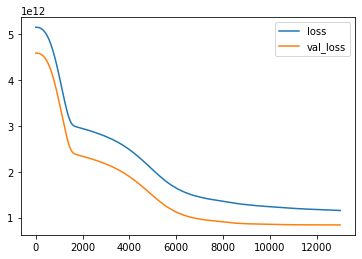

In [36]:
pd.DataFrame(model.history.history).plot()

In [37]:
model.predict(x_test[:2])

array([[2284470. ],
       [3083962.8]], dtype=float32)

In [38]:
x_test[:2]

array([[0.19696483, 0.27528719, 0.11531987, 0.09195402, 0.03333333],
       [0.43772208, 0.298945  , 0.23653199, 0.13793103, 0.03333333]])

In [39]:
ref_x = br_apt_2.iloc[:,:-1]
ref_y = br_apt_2['price']

ref_x_train, ref_x_test, ref_y_train, ref_y_test = train_test_split(x, y, test_size=0.15, random_state=21)

ref_x_test[:2]

,lat,lon,surface_covered_in_m2,floor,rooms
958,-22.984448,-43.227725,149,9,2
6070,-22.930501,-43.188083,293,13,2


In [40]:
br_apt[(br_apt.floor == 13) & (br_apt.surface_covered_in_m2 == 293)]

,id,operation,property_type,place_name,state_name,lat,lon,surface_covered_in_m2,floor,rooms,price
6070,5988419e727bfabd86e3e4dc2776f755489efa16,sell,apartment,Laranjeiras,Rio de Janeiro,-22.930501,-43.188083,293,13,2,2900000.0
